## Limpeza dos dados e modelos de classificação

Usar esse artigo como base: Dey_Journal of Alloys and Metallurgical Systems 9 (2025) 100144_2025  
DOI: 10.1016/j.jalmes.2024.100144


#### Sobre o dataset
Os dados contém quatro subconjuntos de dados:
- Cols 0 a 2 : São os **Metadados**; Referência do artigo, Código da liga, e o nome da liga.
- Cols 3 a 27 : Composição química dos elementos em porcentagem atômica.
- Cols 28 a 34 : Critérios de HEA.
- Cols 35 a 46 : Procedimento experimental.
- Col 47 : **Target**; Fase formada.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importando a base de dados para prever fases
phase_df = pd.read_csv("input_phase.csv")
phase_df.head()

,Ref,Alloy,Name,Co,Fe,Ni,Si,Al,Cr,Mo,...,Homog. Temperature [°C],Homog. tempo [h],Cold/Hot Working,Conformation temperature [°C],Reduction [%],Heat treatment,temperatura de pico [°C],tempo de pico [h],meio de resfriamento,phase_treated
0,1,Alloy_1,CoFeNi,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FCC
1,1,Alloy_3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FCC
2,1,Alloy_4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FCC + Im
3,1,Alloy_5,CoFeNiSi0.75,26.666667,26.666667,26.666667,20.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FCC + Im
4,1,Alloy_6,Al0.25CoFeNi,30.769231,30.769231,30.769231,NaN,7.692308,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FCC


In [5]:
phase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Ref                                      1124 non-null   int64  
 1   Alloy                                    1124 non-null   object 
 2   Name                                     1124 non-null   object 
 3   Co                                       687 non-null    float64
 4   Fe                                       876 non-null    float64
 5   Ni                                       880 non-null    float64
 6   Si                                       80 non-null     float64
 7   Al                                       664 non-null    float64
 8   Cr                                       779 non-null    float64
 9   Mo                                       198 non-null    float64
 10  Nb                                       221 non

**Análise dos dados**:  
- Composição química apresenta muitos dados NaN. Nesse caso, substituir por 0 (sem a presença do elemento na liga);
- Critérios de HEA não tem dados em branco. Os valores foram calculados previamente com base em artigos;
- Procedimento experimental tem dados numéricos e categóricos, e vários valores nulos. **Fazer uma pré análise desses dados**.

In [3]:
# Dados de Procedimentos Experimentais
phase_df.iloc[:,35:46].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Synthesis                                1124 non-null   object 
 1   As cast/Homogenized right after casting  1118 non-null   object 
 2   Homog. Temperature [°C]                  256 non-null    float64
 3   Homog. tempo [h]                         256 non-null    float64
 4   Cold/Hot Working                         241 non-null    object 
 5   Conformation temperature [°C]            240 non-null    object 
 6   Reduction [%]                            223 non-null    float64
 7   Heat treatment                           276 non-null    object 
 8   temperatura de pico [°C]                 276 non-null    float64
 9   tempo de pico [h]                        276 non-null    float64
 10  meio de resfriamento                     190 non

In [7]:
# Substituir o texto
phase_df['Synthesis'] = phase_df['Synthesis'].str.replace("Arc melting", "Arc Melting")

In [8]:
phase_df['Synthesis'].value_counts(normalize= True)*100

Arc Melting            84.163701
Induction furnace      15.480427
Casting                 0.266904
Mechanical alloying     0.088968
Name: Synthesis, dtype: float64

##### Sobre 'Synthesis'
Os dados são, em maioria, por Arc Melting, junto com 15% de Induction Furnace, completa quase toda sua totalidade. Podemos descartar essa feature. **Pouca variância de dados**.

In [9]:
phase_df['As cast/Homogenized right after casting'] = phase_df['As cast/Homogenized right after casting'].str.replace("as cast","As cast")

In [10]:
phase_df['As cast/Homogenized right after casting'].value_counts(normalize= True)

As cast              0.765653
Homogenized          0.230769
High Pressure Die    0.003578
Name: As cast/Homogenized right after casting, dtype: float64

##### Sobre 'As cast/homogenized'
Caso possível de estratificação. 76% As cast e 23% Homogenized. Tentar não utilizar essa feature. A princípio, não me parece de grande importância.

In [16]:
phase_df['Cold/Hot Working'] = phase_df['Cold/Hot Working'].str.replace("Hot rolling", "Hot Rolling")

In [17]:
phase_df['Cold/Hot Working'].value_counts(normalize= True)

Cold Rolling                  0.796680
Hot Rolling                   0.066390
HIP                           0.049793
Hot Forging                   0.045643
Hot Rolling + Cold Rolling    0.024896
Hot Forging + Warm Rolling    0.016598
Name: Cold/Hot Working, dtype: float64

#### Sobre 'Cold/Hot Working'
Pode haver uma grande influência no aumento de propriedades, principalmente a mecânica. Para previsão de fases, talvez não seja tão importante. Caso utilize, reduzir para quatro categorias: **'Cold'**, **'Hot'**, **'Hot&Cold'**, **'No conformation'**.

In [18]:
phase_df["Heat treatment"] = phase_df["Heat treatment"].str.replace('Annealing', 'Annealed')

In [19]:
phase_df['Heat treatment'].value_counts(normalize= True)

Annealed    0.90942
Aging       0.09058
Name: Heat treatment, dtype: float64

#### Sobre 'Heat treatment'
Quase 91% é Annealing e 9% é Aging. Podemos reduzir para três categorias: **'Annealing'**, **'Aging'** e **'No HT'**. Pode ser necessário estratificação dos dados.

---

### Trabalhando com os dados de Composição química

In [9]:
chem_df = phase_df.iloc[:, 3:27]
chem_df.head()

,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,C,...,B,Y,Sn,Li,Mg,Zn,Sc,Hf,Ta,W
0,33.333333,33.333333,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30.769231,30.769231,30.769231,7.692308,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28.571429,28.571429,28.571429,14.285714,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26.666667,26.666667,26.666667,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30.769231,30.769231,30.769231,NaN,7.692308,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Sobre a composição química
Dados variam de 0 (NaN) a 100 (quase nenhum chega a esse valor, mas é o maior valor possível).
- Fazer : Substituir os dados vazios por 0, normalizar (dados podem ser pré-processados durante a preparação para ML).

In [10]:
chem_df.fillna(0, inplace= True)

In [11]:
# Sem valores nulos
chem_df.isna().sum().sum()

0

---

In [12]:
# Colocar 0 nos dados de composição química
phase_df.iloc[:, 3:27] = phase_df.iloc[:, 3:27].fillna(0)

In [13]:
# Dropando os procedimentos experimentais
phase_df_temp = phase_df.drop(phase_df.iloc[:,35:46].columns, axis= 1)

In [14]:
# Checando valores nulos
phase_df_temp.isna().sum().sum()

0

In [15]:
phase_df_temp.head()

,Ref,Alloy,Name,Co,Fe,Ni,Si,Al,Cr,Mo,...,W,radius_diff,electronegativity,vec,dHmix,dSmix,Tm,dHel,omega,phase_treated
0,1,Alloy_1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.000000,0.0,0.0,...,0.0,0.327647,0.032998,9.000000,-1.333333,9.134412,1769.150000,0.043021,12.120109,FCC
1,1,Alloy_3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.000000,0.0,0.0,...,0.0,2.025282,0.032490,8.615385,-11.834320,10.686569,1762.842308,1.000238,1.591873,FCC
2,1,Alloy_4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.000000,0.0,0.0,...,0.0,2.657710,0.031944,8.285714,-19.428571,11.239408,1757.435714,1.729124,1.016675,FCC + Im
3,1,Alloy_5,CoFeNiSi0.75,26.666667,26.666667,26.666667,20.000000,0.000000,0.0,0.0,...,0.0,3.045363,0.031383,8.000000,-24.960000,11.468125,1752.750000,2.287570,0.805319,FCC + Im
4,1,Alloy_6,Al0.25CoFeNi,30.769231,30.769231,30.769231,0.000000,7.692308,0.0,0.0,...,0.0,3.944930,0.077000,8.538462,-6.059172,10.686569,1704.842308,2.503838,3.006833,FCC


### Dados limpos

Precisa tratar os dados:
- Remover 'Ref', 'Alloy' e 'Name'.
- Os dados já são numéricos, mas o target é categórico - usar o ````sklearn.preprocessing.LabelEncoder()```` e listar as fases.
- Os dados tem magnitudes diferentes - usar o ````sklearn.preprocessing.StandardScaler()````.
- Colocar num pipeline ````sklearn.compose.ColumnTransformer()````.

In [20]:
df = pd.read_csv("chem_criteria_phase_clean.csv")
df

,Ref,Alloy,Name,Co,Fe,Ni,Si,Al,Cr,Mo,...,W,radius_diff,electronegativity,vec,dHmix,dSmix,Tm,dHel,omega,phase_treated
0,1,Alloy_1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.000000,0.00,0.0,...,0.0,0.327647,0.032998,9.000000,-1.333333,9.134412,1769.150000,0.043021,12.120109,FCC
1,1,Alloy_3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.000000,0.00,0.0,...,0.0,2.025282,0.032490,8.615385,-11.834320,10.686569,1762.842308,1.000238,1.591873,FCC
2,1,Alloy_4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.000000,0.00,0.0,...,0.0,2.657710,0.031944,8.285714,-19.428571,11.239408,1757.435714,1.729124,1.016675,FCC + Im
3,1,Alloy_5,CoFeNiSi0.75,26.666667,26.666667,26.666667,20.000000,0.000000,0.00,0.0,...,0.0,3.045363,0.031383,8.000000,-24.960000,11.468125,1752.750000,2.287570,0.805319,FCC + Im
4,1,Alloy_6,Al0.25CoFeNi,30.769231,30.769231,30.769231,0.000000,7.692308,0.00,0.0,...,0.0,3.944930,0.077000,8.538462,-6.059172,10.686569,1704.842308,2.503838,3.006833,FCC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,232,Alloy_1267,Fe24.25Cr24.25Co24.25Ni24.25Ti3,24.250000,24.250000,24.250000,0.000000,0.000000,24.25,0.0,...,0.0,2.944909,0.106541,8.122500,-6.060075,12.300868,1873.977500,1.894931,3.803839,FCC
1120,232,Alloy_1268,Fe23.75Cr23.75Co23.75Ni23.75Ti5,23.750000,23.750000,23.750000,0.000000,0.000000,23.75,0.0,...,0.0,3.741997,0.112279,8.037500,-7.516875,12.600582,1875.362500,3.117682,3.143681,FCC
1121,233,Alloy_1269,Fe35Ni35Cr20Mn10,0.000000,35.000000,35.000000,0.000000,0.000000,20.00,0.0,...,0.0,2.527525,0.121260,8.200000,-4.180000,10.700941,1826.700000,1.658067,4.676414,FCC
1122,233,Alloy_1270,Fe33.355Ni33.355Cr19.06Mn9.53Ti4.7,0.000000,33.355000,33.355000,0.000000,0.000000,19.06,0.0,...,0.0,4.237953,0.130186,8.002600,-7.451259,11.774304,1832.079150,4.399552,2.895008,FCC


### Sobre o target

Os dados de target estão em formato categórico. Converter cada fase a um número. Usaremos o ````sklearn.preprocessing.LabelEncoder()````.

In [21]:
y = df['phase_treated']

In [22]:
y.value_counts(normalize= True)*100

FCC               24.822064
BCC + Im          21.085409
FCC + Im          18.149466
BCC               17.526690
BCC + FCC         12.188612
BCC + FCC + Im     6.227758
Name: phase_treated, dtype: float64

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_transf = label_encoder.fit_transform(y)

In [24]:
pd.DataFrame(y_transf).value_counts(normalize= True)

4    0.248221
3    0.210854
5    0.181495
0    0.175267
1    0.121886
2    0.062278
dtype: float64

In [47]:
# Obtendo as classes
classes = label_encoder.inverse_transform([0, 1, 2, 3, 4, 5])
classes

array(['BCC', 'BCC + FCC', 'BCC + FCC + Im', 'BCC + Im', 'FCC',
       'FCC + Im'], dtype=object)

---

In [26]:
# Dropando os Metadados
df_treated = df.drop(['Ref', 'Alloy', 'Name'], axis= 1)

In [27]:
# Separar inputs de target
X = df_treated.drop("phase_treated", axis= 1)
y = df_treated['phase_treated'].copy()

In [28]:
# Aplicando LabelEncoder no target
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_treated = label_encoder.fit_transform(y)

### Evitar data leakage

Data leakage ocorre quando alguma informação dos dados de teste afetam os dados de treino. Isso ocorre, no nosso caso, se fizermos StandardScaler (ou qualquer outro scaler) nos dados de input (X). Isso porque não separamos os dados de treino e teste. O ideal a ser feito é, após a separação dos dados de treino e teste, fazer o StandardScaler apenas nos dados de treino e treinar o modelo. Quando for avaliar nos dados de teste, fazer o StandardScaler apenas com os dados de teste.

---

In [29]:
# Separar os dados de train e test, com test_size de 0.2. Não iremos, nesse instante, aplicar estratificação do target.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_treated, 
                                                    test_size= 0.2, 
                                                    random_state= 42)

In [30]:
# Aplicar o StandardScaler nos dados de treino - Possível problema (os dados de composição química estão variando de 0 a 100, mas estou normalizando)
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep = standard_scaler.fit_transform(X_train)

In [31]:
X_prep

array([[ 0.62103372,  0.04377894,  0.26971022, ..., -0.19115454,
        -0.60953593, -0.09646102],
       [ 1.72623689, -1.39217158,  1.41187624, ...,  0.1924522 ,
        -0.65225686, -0.25911447],
       [ 0.78368579,  0.17889025,  0.43780209, ..., -0.34746244,
        -0.49200266, -0.24462266],
       ...,
       [ 1.7734678 , -1.39217158,  1.46068675, ...,  0.11516702,
        -0.82760002, -0.24678631],
       [ 0.98771729,  0.3483745 ,  0.6486573 , ..., -0.00870105,
        -0.80477766, -0.17123248],
       [-1.1076174 , -1.39217158, -1.51675459, ...,  1.40311867,
         0.76053319, -0.29753658]])

In [32]:
# Usando o modelo mais comum
from sklearn.linear_model import LogisticRegression

# Instanciar e treinar
lr_classifier = LogisticRegression()
lr_classifier.fit(X_prep, y_train)

LogisticRegression()

In [33]:
# Testando a previsão com um dado do treino
X_prep[[1]]

array([[ 1.72623689, -1.39217158,  1.41187624, -0.23903342, -0.90756494,
         0.38200947, -0.39496324, -0.46128185, -0.51855505, -0.15158649,
         1.74659157, -0.3560787 , -0.49988137, -0.45782195, -0.06371312,
         0.        , -0.07985839, -0.04721922, -0.0634078 , -0.0717155 ,
        -0.03337043, -0.28111656,  0.0648288 , -0.1556163 , -1.12087044,
        -0.25059683,  0.73769955, -0.30870834, -0.77355721,  0.1924522 ,
        -0.65225686, -0.25911447]])

In [34]:
# Prevendo com o dado acima
y_pred_train_1 = lr_classifier.predict(X_prep[[1]])
y_pred_train_1

array([4])

In [35]:
# Qual o valor certo?
y_train[[1]]

array([4])

In [36]:
# Qual é a fase?
label_encoder.inverse_transform([4])

array(['FCC'], dtype=object)

In [44]:
labels = label_encoder.inverse_transform(range(6))

Salvar o modelo
````python
import joblib

joblib.dump(lr_classifier, "lr_model.pkl")
````

In [37]:
import joblib

lr_classifier = joblib.load("lr_model.pkl")

### Avaliando os dados 
Usando ````sklearn.model_selection.cross_val_score````

In [38]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_test = standard_scaler.fit_transform(X_test)

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_classifier, X_prep_test, y_test, cv= 5, scoring= 'accuracy')
print(f"Acurácia baixa : {round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

Acurácia baixa : 0.66 ± 0.03


In [40]:
# Usando cross validation para predizer os dados
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(lr_classifier, X_prep_test, y_test, cv= 5)

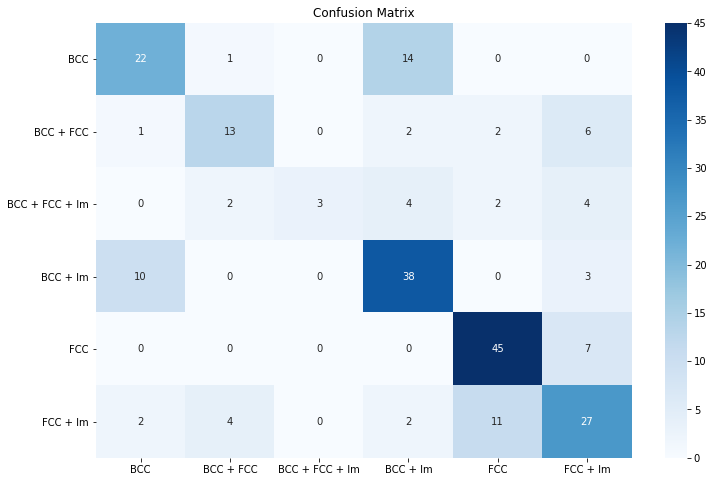

In [46]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (12,8))
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot= True, fmt= 'd', 
            cmap= 'Blues', xticklabels = labels, yticklabels= labels)
plt.title("Confusion Matrix")
plt.show()

In [38]:
label_encoder.inverse_transform([0,1,2,3,4,5])

array(['BCC', 'BCC + FCC', 'BCC + FCC + Im', 'BCC + Im', 'FCC',
       'FCC + Im'], dtype=object)

### Avaliação

LogisticRegression não apresentou bons resultados. Pela matriz de confusão, é muito difícil definir as fases combinadas de 'BCC + FCC' (Label 1) e 'BCC + FCC + Im' (Label 2). Tentar com outros modelos mais robustos.

---

### Usando o modelo de SGDClassifier

SGD Classifier (Stochastic Gradient Descent). Este modelo lida bem com grandes dados e implementa regularização.

In [39]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_classifier = SGDClassifier(alpha= 0.001, penalty= 'l1') 
scores = cross_val_score(sgd_classifier, X_prep, y_train, scoring= 'accuracy', cv= 5)

In [40]:
# Scores do modelo SGDClassifier
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.65 ± 0.02


In [41]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_test = standard_scaler.fit_transform(X_test)

In [42]:
from sklearn.model_selection import cross_val_predict

y_pred_sgd = cross_val_predict(sgd_classifier, X_prep_test, y_test, cv=5)

In [43]:
from sklearn.preprocessing import LabelEncoder

labels = label_encoder.inverse_transform(range(0,6))
labels

array(['BCC', 'BCC + FCC', 'BCC + FCC + Im', 'BCC + Im', 'FCC',
       'FCC + Im'], dtype=object)

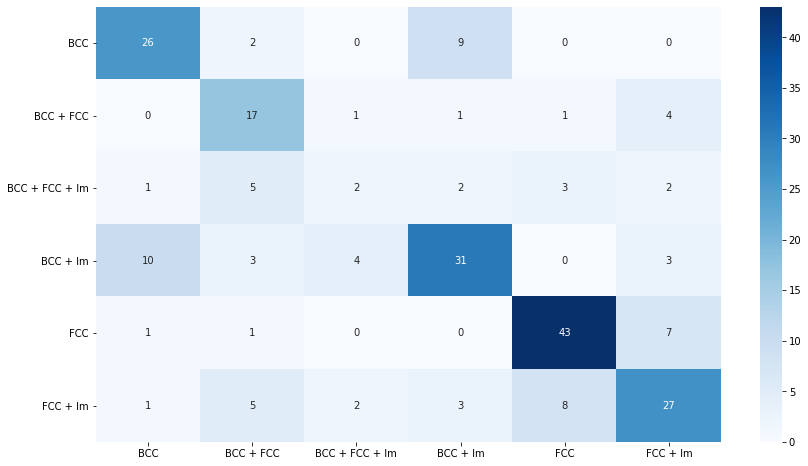

In [44]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (14,8))
sns.heatmap(confusion_matrix(y_test, y_pred_sgd), 
            annot= True, 
            cmap= 'Blues', 
            xticklabels=labels,
            yticklabels= labels)
plt.show()

#### Avaliação do ````sklearn.linear_model.SGDClassifier````

1) Assim como o modelo de Regressão Logística, não há uma boa classificação dos dados das 'dual-phases' (BCC+FCC e BCC+FCC+Im).  
Principalmente que as fases de 'BCC + FCC + Im' somam 6% dos dados e poucos dados podem levar a uma baixa acurácia de valores. Outro motivo é a dificuldade de ditinguir com 'BCC + FCC'. Fora que a presença de duas fases não corresponde a quantidades equivalentes de duas fases, com exemplos de fases com 80% FCC e 20% BCC. É conveniente combinar essas duas fases em um Label.

2) Além disso, há uma grande dificuldade de Identificar fases com e sem Intermetálicos.
Nos artigos, a presença de fases com Im e sem Im depende da metodologia dos autores dos artigos. Alguns Im podem aparecer finamente na microestrutura e, e não houver análises mais profundas (por exemplo, utilizar TEM para verificar precipitações após envelhecimento) além do DRX, essa presença de Im pode passar despercebida.

- **Possível solução para melhorar a previsão das fases é simplificar os Labels ao mesclar labels de fases com e sem Im, tendo ao final três labels distindas: FCC, BCC e BCC+FCC.**


---

#### Usando ````sklearn.tree.DecisionTree````

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar e treinar
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_prep, y_train)

DecisionTreeClassifier()

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_classifier, X_prep, y_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.73 ± 0.04


In [47]:
# Aplicar StandardScaler nos dados de treino
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_pred_test = standard_scaler.fit_transform(X_test)

In [48]:
# Avaliar com os dados de teste
from sklearn.model_selection import cross_val_predict

y_pred_test = cross_val_predict(tree_classifier, X_pred_test, y_test, cv= 5)

In [49]:
from sklearn.preprocessing import LabelEncoder

labels = label_encoder.inverse_transform(range(6))

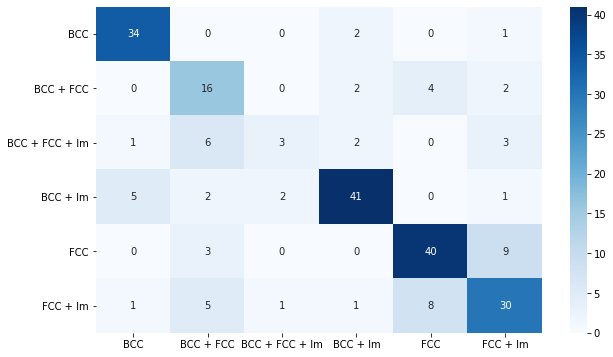

In [50]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), 
            annot= True,
            cmap= "Blues", 
            xticklabels= labels, 
            yticklabels= labels)
plt.show()

In [51]:
y_proba_test = tree_classifier.predict_proba(X_pred_test)

In [52]:
from sklearn.metrics import roc_auc_score

dt_roc = roc_auc_score(y_test, y_proba_test, multi_class= 'ovr')
dt_roc

0.7950970005270377

In [53]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"Precision is {precision} and Racall is {recall}, and accuracy is {accuracy}")

Precision is 0.6841399402706401 and Racall is 0.668485306081214, and accuracy is 0.7288888888888889


### Avaliação de Decision Tree

Teve um score de 73% com os dados de treino e 72% de acurácia com os dados de teste. Não apresentou underfit nem overfit

---

#### Aplicando RandomForest

Com ````sklearn.ensemble.RandomForest````

In [54]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Instanciar e treinar
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_prep_train, y_train)

RandomForestClassifier()

In [56]:
from sklearn.model_selection import cross_val_score

# Scores dos dados de treino
scores = cross_val_score(rf_classifier, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.77 ± 0.01


In [57]:
# StandardScaler nos dados de teste
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_test = standard_scaler.fit_transform(X_test)

In [58]:
from sklearn.model_selection import cross_val_predict

y_prep_test = cross_val_predict(rf_classifier, X_prep_test, y_test, cv= 5)

In [59]:
from sklearn.preprocessing import LabelEncoder

labels = label_encoder.inverse_transform(range(6))

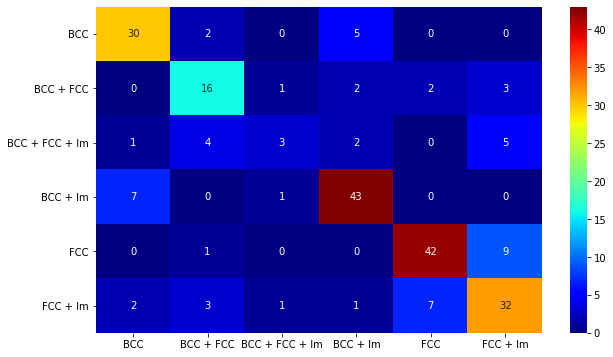

In [60]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_prep_test), annot= True, cmap= 'jet', xticklabels= labels, yticklabels= labels)
plt.show()

### Sobre o modelo de RandomForest
Apesar de ter uma acurácia maior (77% $\pm$ 2), a dual-phase ainda é um problema de identificação.

---

### Usando KNeighborsClassifier

In [61]:
# Pré-processar os dados de treino
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)

In [62]:
# Usando o K Nieghbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knc_classifier = KNeighborsClassifier()
y_prep_train = knc_classifier.fit(X_prep_train, y_train)

In [63]:
# Avaliar os dados de treino
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knc_classifier, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(), 2)}")

0.67 ± 0.03


In [64]:
# Avaliar com os dados de teste
X_prep_test = standard_scaler.fit_transform(X_test)

In [65]:
from sklearn.model_selection import cross_val_predict

y_pred_test = cross_val_predict(knc_classifier, X_prep_test, y_test, cv= 5)

In [66]:
# Inverse Labels
from sklearn.preprocessing import LabelEncoder

labels = label_encoder.inverse_transform(range(6))

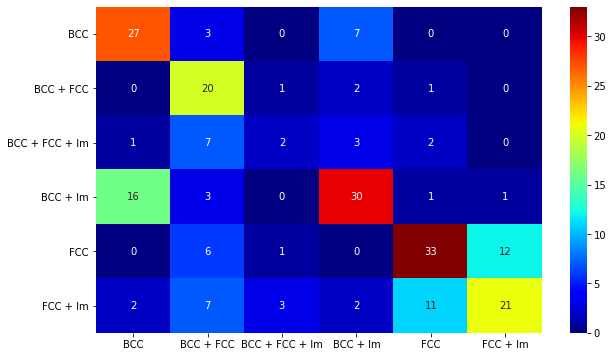

In [67]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), 
            annot= True, 
            cmap= 'jet', 
            xticklabels= labels, 
            yticklabels= labels)
plt.show()

In [68]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred_test, average= 'macro')
recall = recall_score(y_test, y_pred_test, average= 'macro')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"Precision: {round(precision,2)}")
print(f"Recall: {round(recall,2)}")
print(f"Accuracy: {round(accuracy,2)}")

Precision: 0.55
Recall: 0.56
Accuracy: 0.59


In [69]:
y_pred = knc_classifier.predict_proba(X_test)

In [70]:
# qual é o roc_auc_score?
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred, multi_class= 'ovo')

0.5285005608598959

### Avaliação  
````sklearn.neighbors.KNeighborsClassification```` não teve uma boa avaliação

---

### Usando SVC

In [72]:
# Pré-processar os dados de treino
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)

In [74]:
# Instanciar e treinar
from sklearn.svm import SVC

# Instanciar e treinar
svc_classifier = SVC()
svc_classifier.fit(X_prep_train, y_train)

SVC()

In [76]:
# cross_val_score dos dados de treino
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc_classifier, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.67 ± 0.04


In [77]:
# Pré-processar os dados de teste
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_test = standard_scaler.fit_transform(X_test)

In [78]:
# Predizer com cross validation
from sklearn.model_selection import cross_val_predict

y_pred_test = cross_val_predict(svc_classifier, X_prep_test, y_test, cv= 5)

In [79]:
# labels
from sklearn.preprocessing import LabelEncoder

labels = label_encoder.inverse_transform(range(6))

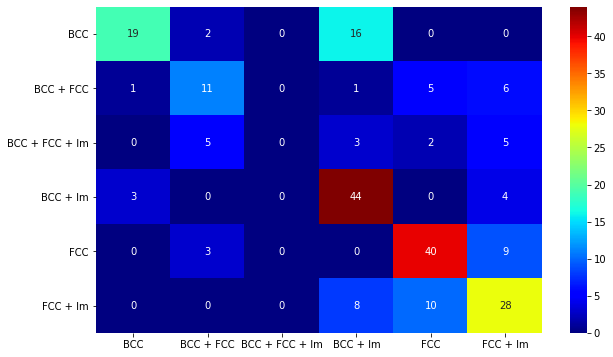

In [81]:
# Metricas: matriz de confusão, precision, recall, acurácia, roc_auc_score (este com predict_proba)
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), 
            annot= True, 
            cmap= 'jet', 
            xticklabels= labels, 
            yticklabels= labels)
plt.show()

In [89]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

precision = precision_score(y_test, y_pred_test, average= 'macro')
recall = recall_score(y_test, y_pred_test, average= 'macro')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"Precision : {round(precision,2)}")
print(f"Recall : {round(recall,2)}")
print(f"Accuracy : {round(accuracy,2)}")

Precision : 0.53
Recall : 0.54
Accuracy : 0.63


In [92]:
svc_classifier.decision_function(X_prep_test[:3])

array([[-0.27553731,  2.87830608,  1.79749826,  0.72993453,  5.2935681 ,
         4.26354419],
       [-0.28361665,  4.25826507,  3.16847174,  0.73744992,  1.90899577,
         5.28064997],
       [ 4.12062884,  2.12603867,  3.12444542,  5.287198  , -0.29300044,
         0.8591829 ]])

In [93]:
svc_classifier.predict(X_prep_test[:3])

array([4, 5, 3])

In [94]:
# Usando probability = True
svc_classifier = SVC(probability= True)
svc_classifier.fit(X_prep_train, y_train)

SVC(probability=True)

In [95]:
svc_classifier.predict_proba(X_prep_test[:3])

array([[0.00179751, 0.01250756, 0.01637541, 0.00171721, 0.8252785 ,
        0.14232381],
       [0.00728531, 0.24754178, 0.15314076, 0.00667369, 0.07447701,
        0.51088146],
       [0.11569714, 0.02532135, 0.08072053, 0.7555043 , 0.00297133,
        0.01978535]])

In [96]:
svc_classifier.predict(X_prep_test[:3])

array([4, 5, 3])

### Usando ````xgboost.XGBoostClassifier()````

Ver mais em https://xgboost.readthedocs.io/en/stable/python/index.html

In [100]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)

In [105]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_prep_train, y_train)

[13:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_prep_train, y_train, cv= 5, scoring= "accuracy")
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

[13:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [108]:
from sklearn.preprocessing import StandardScaler

X_prep_test = StandardScaler().fit_transform(X_test)

In [109]:
y_pred_test = xgb_classifier.predict(X_prep_test)

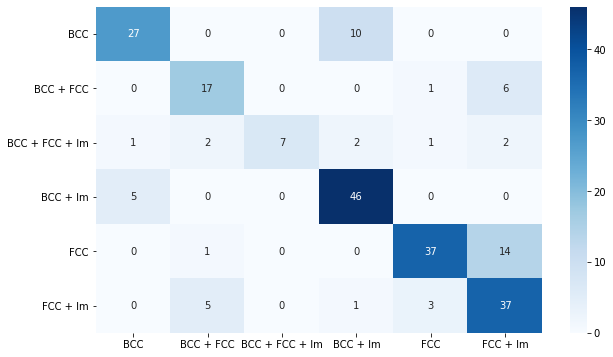

In [112]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot= True, cmap= 'Blues', xticklabels= labels, yticklabels= labels)
plt.show()

In [114]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred_test, average= 'macro')
recall = recall_score(y_test, y_pred_test, average= 'macro')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"Precision : {round(precision,2)}")
print(f"Recall : {round(recall,2)}")
print(f"accuracy : {round(accuracy,2)}")

Precision : 0.8
Recall : 0.72
accuracy : 0.76


In [115]:
from sklearn.model_selection import cross_val_predict

y_pred_cross_val = cross_val_predict(xgb_classifier, X_prep_test, y_test, cv= 5)

[14:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

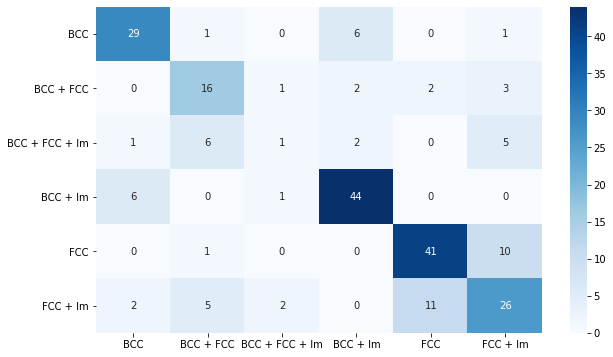

In [116]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_cross_val), annot= True, cmap= 'Blues', xticklabels= labels, yticklabels= labels)
plt.show()

In [117]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred_test, average= 'macro')
recall = recall_score(y_test, y_pred_test, average= 'macro')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"Precision : {round(precision,2)}")
print(f"Recall : {round(recall,2)}")
print(f"accuracy : {round(accuracy,2)}")

Precision : 0.8
Recall : 0.72
accuracy : 0.76


In [122]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Instanciar o modelo
xgb_classifier = XGBClassifier(objective= 'multi:softmax')

# Hiperparâmetros
param_grid = {'n_estimators': [100, 200, 400], 
              'max_depth': [3, 6, 9, 12], 
              'learning_rate': [0.03, 0.3]}

xgb_grid = GridSearchCV(xgb_classifier, param_grid, scoring= 'accuracy', cv= 5, return_train_score= True)
xgb_grid.fit(X_prep_train, y_train)

[14:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
      

In [125]:
model = xgb_grid.best_estimator_

In [126]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

[14:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [127]:
from sklearn.model_selection import cross_val_predict

y_pred_cross_val = cross_val_predict(model, X_prep_test, y_test, cv= 5)

[14:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [128]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred_test, average= 'macro')
recall = recall_score(y_test, y_pred_test, average= 'macro')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"Precision : {round(precision,2)}")
print(f"Recall : {round(recall,2)}")
print(f"accuracy : {round(accuracy,2)}")

Precision : 0.8
Recall : 0.72
accuracy : 0.76


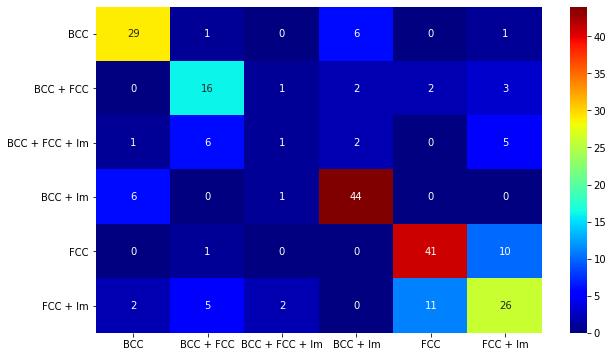

In [132]:
from sklearn.metrics import confusion_matrix

# colocar num heatmap
plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_cross_val), 
            annot= True, 
            cmap= 'jet', 
            xticklabels= labels, 
            yticklabels= labels)
plt.show()

---

### Conclusão

A melhor aproximação foi com ````xgboost.XGBClassifier```` com ````sklearn.model_selection.GridSearchCV```` para obter os melhores hiperparâmetros.  
Obteve-se acuárcia de 77% $\pm$ 3 para os dados de treino e 76% para os dados de teste, indicando que não houve nem overfit nem underfit. 
No entanto, há dificuldades em distinguir algumas fases, como a dual-phase com Intermetálico.  
**Talvez seja interessante dropar essas fases e simplificar ao remover a distinção entre com e sem Intermetálico. Assim, podemos melhorar a precisão e o recall**

---

### Alterando os Labels
Remover 'BCC + FCC + Im'. Obter uma acurácia acima de 85% (se possível, acima de 90%). Caso não atinja esse valor, deixar apenas três labels: 'BCC', 'FCC' e 'BCC + FCC'.

In [185]:
df = pd.read_csv('chem_criteria_phase_clean.csv')
df.head()

,Ref,Alloy,Name,Co,Fe,Ni,Si,Al,Cr,Mo,...,W,radius_diff,electronegativity,vec,dHmix,dSmix,Tm,dHel,omega,phase_treated
0,1,Alloy_1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.000000,0.0,0.0,...,0.0,0.327647,0.032998,9.000000,-1.333333,9.134412,1769.150000,0.043021,12.120109,FCC
1,1,Alloy_3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.000000,0.0,0.0,...,0.0,2.025282,0.032490,8.615385,-11.834320,10.686569,1762.842308,1.000238,1.591873,FCC
2,1,Alloy_4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.000000,0.0,0.0,...,0.0,2.657710,0.031944,8.285714,-19.428571,11.239408,1757.435714,1.729124,1.016675,FCC + Im
3,1,Alloy_5,CoFeNiSi0.75,26.666667,26.666667,26.666667,20.000000,0.000000,0.0,0.0,...,0.0,3.045363,0.031383,8.000000,-24.960000,11.468125,1752.750000,2.287570,0.805319,FCC + Im
4,1,Alloy_6,Al0.25CoFeNi,30.769231,30.769231,30.769231,0.000000,7.692308,0.0,0.0,...,0.0,3.944930,0.077000,8.538462,-6.059172,10.686569,1704.842308,2.503838,3.006833,FCC


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ref                1124 non-null   int64  
 1   Alloy              1124 non-null   object 
 2   Name               1124 non-null   object 
 3   Co                 1124 non-null   float64
 4   Fe                 1124 non-null   float64
 5   Ni                 1124 non-null   float64
 6   Si                 1124 non-null   float64
 7   Al                 1124 non-null   float64
 8   Cr                 1124 non-null   float64
 9   Mo                 1124 non-null   float64
 10  Nb                 1124 non-null   float64
 11  Ti                 1124 non-null   float64
 12  C                  1124 non-null   float64
 13  V                  1124 non-null   float64
 14  Zr                 1124 non-null   float64
 15  Mn                 1124 non-null   float64
 16  Cu                 1124 

In [187]:
# Remover features que não participam tem informações do modelo
df.drop(['Ref', 'Alloy', 'Name'], axis= 1, inplace= True)

In [189]:
df['phase_treated'].value_counts()

FCC               279
BCC + Im          237
FCC + Im          204
BCC               197
BCC + FCC         137
BCC + FCC + Im     70
Name: phase_treated, dtype: int64

In [198]:
df = df[df['phase_treated'] != "BCC + FCC + Im"]

In [232]:
df['phase_treated'].value_counts()

FCC          279
BCC + Im     237
FCC + Im     204
BCC          197
BCC + FCC    137
Name: phase_treated, dtype: int64

In [236]:
# Baixar o dataframe
import pandas as pd

df = pd.read_csv('new_df.csv')

In [237]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
target = df['phase_treated'].copy()

# Obtendo os dados de target com Encoder
y = label_encoder.fit_transform(target)

# obter o inverse_transform
label = list(set(y))
labels = label_encoder.inverse_transform(label)

In [238]:
y = pd.DataFrame(y)

In [239]:
# Dados de input
X = df.drop('phase_treated', axis= 1)

#### Separar os dados em treino e test

In [240]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

#### StandardScaler nos dados de treino

In [270]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)

In [271]:
len(X_prep_train)

843

#### Aplicar o modelo de ````sklearn.ensemble.RandomForest```` com GridSearchCV

In [272]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_prep_train, y_train)

RandomForestClassifier()

In [273]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_classifier, X_prep_train, y_train, scoring= 'accuracy', cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.8 ± 0.02


In [274]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_test = standard_scaler.fit_transform(X_test)

In [275]:
from sklearn.model_selection import cross_val_predict

y_pred_test = cross_val_predict(rf_classifier, X_prep_test, y_test, cv= 5)

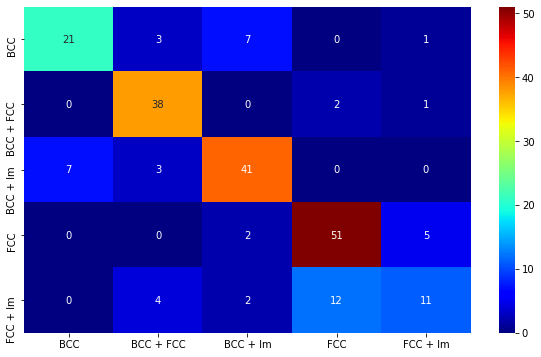

In [276]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_test),
            annot= True,
            cmap= 'jet',
            xticklabels= labels,
            yticklabels= labels)
plt.show()

In [277]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred_test, average= 'macro')
recall = recall_score(y_test, y_pred_test, average= 'macro')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"Accuracy : {accuracy}")

Precision : 0.7451709401709401
Recall : 0.7291243053150612
Accuracy : 0.7677725118483413


In [278]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Instanciar o modelo
rf_classifier = RandomForestClassifier()

# Hiperparâmetros
param_grid = {'n_estimators': [100, 200, 400], 
              'max_depth': [3, 6, 9, 12]}

rf_grid = GridSearchCV(rf_classifier, 
                       param_grid= param_grid, 
                       cv= 5, 
                       scoring= 'accuracy',
                       return_train_score= True)
rf_grid.fit(X_prep_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [100, 200, 400]},
             return_train_score=True, scoring='accuracy')

In [279]:
model = rf_grid.best_estimator_

In [280]:
y_pred_test = model.predict(X_prep_test)

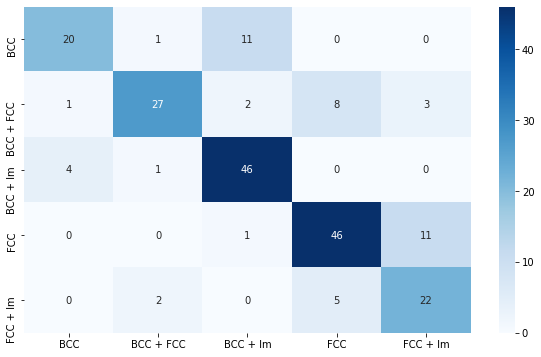

In [283]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_test),
            annot= True,
            cmap= 'Blues',
            xticklabels= labels,
            yticklabels= labels)
plt.show()

In [285]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred_test, average= 'macro')
recall = recall_score(y_test, y_pred_test, average= 'macro')
accuracy = accuracy_score(y_test, y_pred_test)

print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"Accuracy : {accuracy}")

Precision : 0.7656813073324829
Recall : 0.7474443015221228
Accuracy : 0.7630331753554502


---

### Testar somente com os dados sem Im.
Mesclar os labels com a mesma fase

In [286]:
# Importando as bibliotecas comuns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [288]:
df = pd.read_csv("chem_criteria_phase_clean.csv")
df["phase_treated"].value_counts()

FCC               279
BCC + Im          237
FCC + Im          204
BCC               197
BCC + FCC         137
BCC + FCC + Im     70
Name: phase_treated, dtype: int64

In [295]:
# Mesclar os labels com Im com os labels sem Im.
df['phase_treated'] = df['phase_treated'].replace("FCC + Im","FCC").replace("BCC + Im", "BCC").replace("BCC + FCC + Im", "BCC + FCC")

In [296]:
df["phase_treated"].value_counts()

FCC          483
BCC          434
BCC + FCC    207
Name: phase_treated, dtype: int64

In [300]:
df = df.drop(['Ref', 'Alloy', 'Name'], axis= 1)

### A partir daqui

In [233]:
# Importando as bibliotecas comuns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [234]:
df = pd.read_csv('no_im_df.csv')
df['phase_treated'].value_counts()

FCC          483
BCC          434
BCC + FCC    207
Name: phase_treated, dtype: int64

In [235]:
# Label Encoder do target
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['phase_treated'])
y = y.reshape(-1,1)

In [236]:
np.unique(y)

array([0, 1, 2])

In [237]:
labels = label_encoder.inverse_transform(np.unique(y))
labels

array(['BCC', 'BCC + FCC', 'FCC'], dtype=object)

In [238]:
X = df.drop('phase_treated', axis= 1)

In [239]:
# Separar os dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [240]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)

In [241]:
# Aplicar o modelo com cross validation com dados de treino
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_classifier = RandomForestClassifier()
scores = cross_val_score(rf_classifier, X_prep_train, y_train, scoring= 'accuracy', cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.9 ± 0.02


In [242]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_test = standard_scaler.fit_transform(X_test)

In [243]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rf_classifier, X_prep_test, y_test, cv= 5)

In [244]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8755555555555555

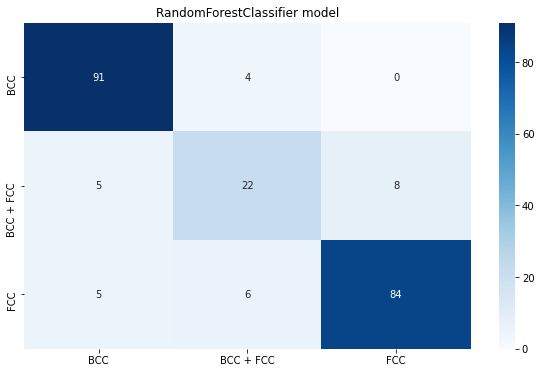

In [245]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
plt.title("RandomForestClassifier model")
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot= True, 
            cmap= 'Blues',
            xticklabels= labels,
            yticklabels= labels)
plt.show()

In [246]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
f1 = f1_score(y_test, y_pred, average= 'macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision : {round(precision,2)}")
print(f"Recall : {round(recall,2)}")
print(f"F1 : {round(f1,2)}")
print(f"Accuracy : {round(accuracy,2)}")

Precision : 0.83
Recall : 0.82
F1 : 0.83
Accuracy : 0.88


In [338]:
import joblib

joblib.dump(rf_classifier, "rf_model.pkl")

['rf_model.pkl']

In [247]:
y_pred = rf_classifier.fit(X_prep_train, y_train)
y_pred

RandomForestClassifier()

In [248]:
features = pd.DataFrame({'features': X_train.columns})
importance = pd.DataFrame({'importance': rf_classifier.feature_importances_})*100
importances = pd.concat([features, importance], axis= 1).sort_values(by= 'importance', ascending= False)
importances

In [249]:
importances = pd.concat([features, importance], axis= 1).sort_values(by= 'importance', ascending= False)
importances

,features,importance
26,vec,17.443808
4,Al,9.627575
29,Tm,7.994651
24,radius_diff,7.567004
30,dHel,7.023225
2,Ni,6.953870
27,dHmix,6.034889
31,omega,4.965991
7,Nb,4.212312
28,dSmix,4.179263


---

### Aplicação de Redes Neurais

- Começar com os seis labels, caso fique com acurácia muito baixa, usar a base de dados com três labels.

In [16]:
# Importando as bibliotecas comuns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
df = pd.read_csv("chem_criteria_phase_clean.csv")
df.head()

,Ref,Alloy,Name,Co,Fe,Ni,Si,Al,Cr,Mo,...,W,radius_diff,electronegativity,vec,dHmix,dSmix,Tm,dHel,omega,phase_treated
0,1,Alloy_1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.000000,0.0,0.0,...,0.0,0.327647,0.032998,9.000000,-1.333333,9.134412,1769.150000,0.043021,12.120109,FCC
1,1,Alloy_3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.000000,0.0,0.0,...,0.0,2.025282,0.032490,8.615385,-11.834320,10.686569,1762.842308,1.000238,1.591873,FCC
2,1,Alloy_4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.000000,0.0,0.0,...,0.0,2.657710,0.031944,8.285714,-19.428571,11.239408,1757.435714,1.729124,1.016675,FCC + Im
3,1,Alloy_5,CoFeNiSi0.75,26.666667,26.666667,26.666667,20.000000,0.000000,0.0,0.0,...,0.0,3.045363,0.031383,8.000000,-24.960000,11.468125,1752.750000,2.287570,0.805319,FCC + Im
4,1,Alloy_6,Al0.25CoFeNi,30.769231,30.769231,30.769231,0.000000,7.692308,0.0,0.0,...,0.0,3.944930,0.077000,8.538462,-6.059172,10.686569,1704.842308,2.503838,3.006833,FCC


In [19]:
# Dropar as colunas de metadados
df.drop(["Ref", "Alloy", "Name"], axis= 1, inplace= True)

### Com os seis labels

In [20]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["phase_treated"]).reshape(-1,1)
y

array([[4],
       [4],
       [5],
       ...,
       [4],
       [4],
       [0]])

In [21]:
X = df.drop('phase_treated', axis= 1)
X.shape

(1124, 32)

In [22]:
# Obtendo os labels a partir dos números
from sklearn.preprocessing import LabelEncoder

labels = label_encoder.inverse_transform(np.unique(y))

In [23]:
# Separar os dados de treino, teste e validação
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2)

In [24]:
# Separar os dados de treino e validação
X_train, X_val = X_train_full[180:], X_train_full[:180]
y_train, y_val = y_train_full[180:], y_train_full[:180]

In [25]:
X_test.shape[1:]

(32,)

In [26]:
# Podemos aplicar MinMaxScaler, StandardScaler. usaremos o StandardEncoder que me parece mais relevante
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)
X_prep_val = standard_scaler.fit_transform(X_val)

### Construir o modelo de Redes Neurais

In [37]:
model = keras.models.Sequential()
# Camada de entrada - 32 features de entrada
model.add(keras.layers.Dense(32, activation= 'softmax'))
# Uma camada oculta
model.add(keras.layers.Dense(300, activation= 'softmax'))
#model.add(keras.layers.Dense(300, activation= 'softmax'))
# Camada de saída - 6 labels de saída e ativação softmax (multiclasse)
model.add(keras.layers.Dense(len(labels), activation= 'softmax'))

### Compilar o modelo  
Definir a função perda, o otimizador e a métrica

In [38]:
model.compile(optimizer= 'sgd', 
              loss= 'sparse_categorical_crossentropy',
              metrics= 'accuracy')

### Treinar o modelo

Definir um early_stopping com callbacks

In [39]:
# Definir um early stopping
es = keras.callbacks.EarlyStopping(patience= 10, restore_best_weights= True)

In [40]:
history = model.fit(X_train, y_train, callbacks= es, validation_data= [X_val, y_val], epochs= 300)

Epoch 1/300
23/23 [==============================] - 0s 8ms/step - loss: 1.7891 - accuracy: 0.1878 - val_loss: 1.7868 - val_accuracy: 0.2833
Epoch 2/300
23/23 [==============================] - 0s 3ms/step - loss: 1.7844 - accuracy: 0.2476 - val_loss: 1.7826 - val_accuracy: 0.2833
Epoch 3/300
23/23 [==============================] - 0s 3ms/step - loss: 1.7800 - accuracy: 0.2476 - val_loss: 1.7787 - val_accuracy: 0.2833
Epoch 4/300
23/23 [==============================] - 0s 3ms/step - loss: 1.7760 - accuracy: 0.2476 - val_loss: 1.7749 - val_accuracy: 0.2833
Epoch 5/300
23/23 [==============================] - 0s 3ms/step - loss: 1.7721 - accuracy: 0.2476 - val_loss: 1.7714 - val_accuracy: 0.2833
Epoch 6/300
23/23 [==============================] - 0s 3ms/step - loss: 1.7685 - accuracy: 0.2476 - val_loss: 1.7683 - val_accuracy: 0.2833
Epoch 7/300
23/23 [==============================] - 0s 3ms/step - loss: 1.7653 - accuracy: 0.2476 - val_loss: 1.7655 - val_accuracy: 0.2833
Epoch 8/300
2

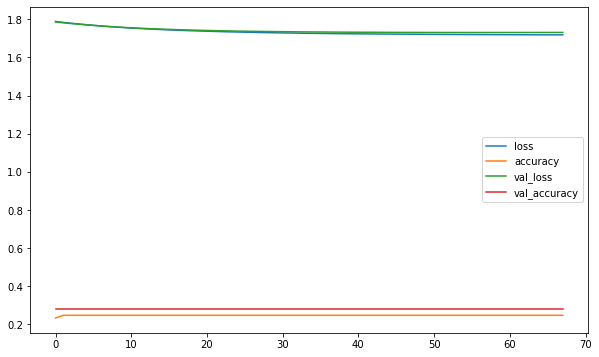

In [36]:
pd.DataFrame(history.history).plot(figsize= (10,6))
plt.show()

### Evaluate

In [31]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_test = standard_scaler.fit_transform(X_test)

In [32]:
cross_entropy_eval = model.evaluate(X_prep_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 1.7200 - accuracy: 0.2222


In [33]:
cross_entropy_eval

[1.7199691534042358, 0.2222222238779068]

## Com três labels

Englobando os labels com 'Im' nos labels sem.

In [41]:
# Já temos uma base de dados pronta para isso
df = pd.read_csv('no_im_df.csv')
df.head()

,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,C,...,W,radius_diff,electronegativity,vec,dHmix,dSmix,Tm,dHel,omega,phase_treated
0,33.333333,33.333333,33.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.327647,0.032998,9.000000,-1.333333,9.134412,1769.150000,0.043021,12.120109,FCC
1,30.769231,30.769231,30.769231,7.692308,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,2.025282,0.032490,8.615385,-11.834320,10.686569,1762.842308,1.000238,1.591873,FCC
2,28.571429,28.571429,28.571429,14.285714,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,2.657710,0.031944,8.285714,-19.428571,11.239408,1757.435714,1.729124,1.016675,FCC
3,26.666667,26.666667,26.666667,20.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,3.045363,0.031383,8.000000,-24.960000,11.468125,1752.750000,2.287570,0.805319,FCC
4,30.769231,30.769231,30.769231,0.000000,7.692308,0.0,0.0,0.0,0.0,0.0,...,0.0,3.944930,0.077000,8.538462,-6.059172,10.686569,1704.842308,2.503838,3.006833,FCC


In [42]:
df["phase_treated"].value_counts()

FCC          483
BCC          434
BCC + FCC    207
Name: phase_treated, dtype: int64

### Separando os dados

In [43]:
X = df.drop("phase_treated", axis= 1)
y = df[["phase_treated"]].copy()

In [44]:
# Converter em Labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [45]:
labels = label_encoder.inverse_transform(y)
np.unique(labels)

array(['BCC', 'BCC + FCC', 'FCC'], dtype=object)

In [46]:
# Separando os dados em treino, teste e validação
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2)

In [47]:
# Separar os dados em treino e validação
X_train, X_val = X_train_full[180:], X_train_full[:180]
y_train, y_val = y_train_full[180:], y_train_full[:180]

In [48]:
# Aplicar o StandardScaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)
X_prep_val = standard_scaler.fit_transform(X_val)
X_prep_test = standard_scaler.fit_transform(X_test)

### Construir o modelo de Redes Neurais - Usar Functional API
Usei duas camadas ocultas com 100 neurônios cada

In [108]:
input_ = keras.layers.Input(shape= X_prep_train.shape[1:])
hidden1 = keras.layers.Dense(300, activation= 'relu')(input_)
output = keras.layers.Dense(3, activation= 'softmax')(hidden1)
model = keras.Model(inputs= input_, outputs= output)

In [109]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32)]              0         
                                                                 
 dense_32 (Dense)            (None, 300)               9900      
                                                                 
 dense_33 (Dense)            (None, 3)                 903       
                                                                 
Total params: 10,803
Trainable params: 10,803
Non-trainable params: 0
_________________________________________________________________


### Compilar os dados

In [110]:
model.compile(loss= 'sparse_categorical_crossentropy', 
              optimizer= 'sgd',
              metrics= 'accuracy')

### Treinar com Early Stopping

In [111]:
es = keras.callbacks.EarlyStopping(patience= 10, restore_best_weights= True)
history = model.fit(X_prep_train, 
                    y_train, 
                    epochs= 20, 
                    callbacks= es, 
                    validation_data= [X_prep_val, y_val])

Epoch 1/20
23/23 [==============================] - 0s 7ms/step - loss: 1.0302 - accuracy: 0.4757 - val_loss: 0.8781 - val_accuracy: 0.7278
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.8245 - accuracy: 0.7330 - val_loss: 0.7507 - val_accuracy: 0.7667
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.7580 - val_loss: 0.6845 - val_accuracy: 0.7833
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.7705 - val_loss: 0.6421 - val_accuracy: 0.7944
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.6419 - accuracy: 0.7775 - val_loss: 0.6116 - val_accuracy: 0.8000
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.7830 - val_loss: 0.5889 - val_accuracy: 0.8000
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.7900 - val_loss: 0.5713 - val_accuracy: 0.8056
Epoch 8/20
23/23 [==

### Evaluate

In [112]:
cross_entropy_eval = model.evaluate(X_prep_test, y_test)
cross_entropy_eval

8/8 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8267


[0.4306585490703583, 0.8266666531562805]

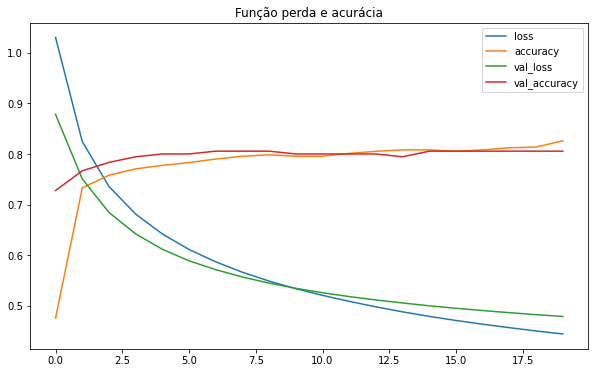

In [113]:
pd.DataFrame(history.history).plot(figsize= (10,6))
plt.title("Função perda e acurácia")
plt.show()

### Predizer algumas instâncias

In [114]:
X_new, y_new = X_prep_test[:10], y_test[:10]

In [115]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 75ms/step


array([[0.0222469 , 0.14358422, 0.83416885],
       [0.66684085, 0.24900287, 0.08415622],
       [0.7721467 , 0.18124738, 0.04660592],
       [0.85880685, 0.12212234, 0.01907085],
       [0.29796335, 0.35138902, 0.35064766],
       [0.9381355 , 0.00290999, 0.05895451],
       [0.16411   , 0.34536788, 0.49052218],
       [0.01058627, 0.03140622, 0.9580075 ],
       [0.49082974, 0.3234064 , 0.1857638 ],
       [0.02751463, 0.10130133, 0.871184  ]], dtype=float32)

In [116]:
for i in range(len(y_pred)):
    print(np.unique(labels)[np.argmax(y_pred[i])])

FCC
BCC
BCC
BCC
BCC + FCC
BCC
FCC
FCC
BCC
FCC


In [117]:
for i in y_new:
    print(np.unique(labels)[i])

FCC
BCC
BCC
BCC
FCC
BCC
BCC + FCC
FCC
BCC
FCC


### Conclusão
Redes Neurais e RandomForestClassifier são os melhores modelos para identificar fases. No entanto, é preciso reduzir o número de Labels para sua identificação. Nota-se que a presença de dados com Intermetálicos afeta os modelos em distinguir quais fases estão presentes, apresentando uma baixa acurácia.  
Podemos testar o PowerTransform (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

---

### Testando todos os modelos com três Labels 16/01/2025

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [119]:
df = pd.read_csv("chem_criteria_phase_clean.csv")
df.head()

,Ref,Alloy,Name,Co,Fe,Ni,Si,Al,Cr,Mo,...,W,radius_diff,electronegativity,vec,dHmix,dSmix,Tm,dHel,omega,phase_treated
0,1,Alloy_1,CoFeNi,33.333333,33.333333,33.333333,0.000000,0.000000,0.0,0.0,...,0.0,0.327647,0.032998,9.000000,-1.333333,9.134412,1769.150000,0.043021,12.120109,FCC
1,1,Alloy_3,CoFeNiSi0.25,30.769231,30.769231,30.769231,7.692308,0.000000,0.0,0.0,...,0.0,2.025282,0.032490,8.615385,-11.834320,10.686569,1762.842308,1.000238,1.591873,FCC
2,1,Alloy_4,CoFeNiSi0.5,28.571429,28.571429,28.571429,14.285714,0.000000,0.0,0.0,...,0.0,2.657710,0.031944,8.285714,-19.428571,11.239408,1757.435714,1.729124,1.016675,FCC + Im
3,1,Alloy_5,CoFeNiSi0.75,26.666667,26.666667,26.666667,20.000000,0.000000,0.0,0.0,...,0.0,3.045363,0.031383,8.000000,-24.960000,11.468125,1752.750000,2.287570,0.805319,FCC + Im
4,1,Alloy_6,Al0.25CoFeNi,30.769231,30.769231,30.769231,0.000000,7.692308,0.0,0.0,...,0.0,3.944930,0.077000,8.538462,-6.059172,10.686569,1704.842308,2.503838,3.006833,FCC


In [120]:
df['phase_treated'].value_counts(normalize= True)

FCC               0.248221
BCC + Im          0.210854
FCC + Im          0.181495
BCC               0.175267
BCC + FCC         0.121886
BCC + FCC + Im    0.062278
Name: phase_treated, dtype: float64

In [121]:
df['phase_treated'] = df['phase_treated'].replace('BCC + FCC + Im', 'BCC + FCC')

In [122]:
df['phase_treated'] = df['phase_treated'].replace('BCC + Im', 'BCC')

In [123]:
df['phase_treated'] = df['phase_treated'].replace('FCC + Im', 'FCC')

In [124]:
df['phase_treated'].value_counts(normalize= True)

FCC          0.429715
BCC          0.386121
BCC + FCC    0.184164
Name: phase_treated, dtype: float64

In [125]:
df_no_im = pd.read_csv('no_im_df.csv')
df_no_im.head()

,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,C,...,W,radius_diff,electronegativity,vec,dHmix,dSmix,Tm,dHel,omega,phase_treated
0,33.333333,33.333333,33.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.327647,0.032998,9.000000,-1.333333,9.134412,1769.150000,0.043021,12.120109,FCC
1,30.769231,30.769231,30.769231,7.692308,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,2.025282,0.032490,8.615385,-11.834320,10.686569,1762.842308,1.000238,1.591873,FCC
2,28.571429,28.571429,28.571429,14.285714,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,2.657710,0.031944,8.285714,-19.428571,11.239408,1757.435714,1.729124,1.016675,FCC
3,26.666667,26.666667,26.666667,20.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,3.045363,0.031383,8.000000,-24.960000,11.468125,1752.750000,2.287570,0.805319,FCC
4,30.769231,30.769231,30.769231,0.000000,7.692308,0.0,0.0,0.0,0.0,0.0,...,0.0,3.944930,0.077000,8.538462,-6.059172,10.686569,1704.842308,2.503838,3.006833,FCC


In [126]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_no_im["phase_treated"]).reshape(-1,1)

In [127]:
labels = label_encoder.inverse_transform(np.unique(y))

In [128]:
X = df_no_im.drop("phase_treated", axis= 1)

In [129]:
# Separar em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [130]:
# Escalar os dados de treino
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)

In [131]:
from sklearn.linear_model import LogisticRegression

lr_classification = LogisticRegression()

In [132]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_classification, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.84 ± 0.02


In [133]:
# StandardScaler do teste
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_test = standard_scaler.fit_transform(X_test)

In [134]:
# cross_Val_predict do teste
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(lr_classification, X_prep_test, y_test, cv= 5)

In [135]:
len(y_pred)

225

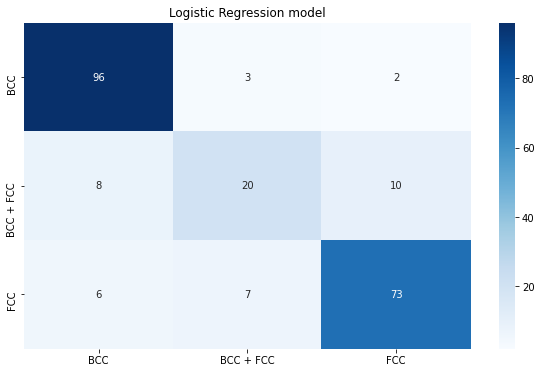

In [139]:
#### confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= 'Blues', xticklabels= labels, yticklabels= labels)
plt.title("Logistic Regression model")
plt.show()

In [137]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision : {round(precision, 2)}")
print(f"Recall : {round(recall, 2)}")
print(f"Accuracy : {round(accuracy, 2)}")

Precision : 0.8
Recall : 0.78
Accuracy : 0.84


---

### SVC

In [140]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc_classifier = SVC()
scores = cross_val_score(svc_classifier, X_prep_train, y_train, cv= 5, scoring= "accuracy")
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.84 ± 0.03


In [141]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(svc_classifier, X_prep_test, y_test, cv= 5)

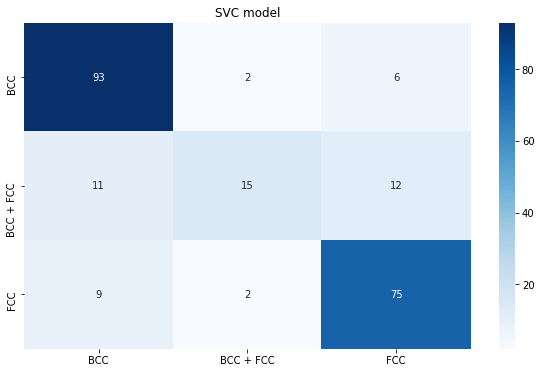

In [144]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= 'Blues', xticklabels= labels, yticklabels= labels)
plt.title("SVC model")
plt.show()

In [145]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision : {round(precision, 2)}")
print(f"Recall : {round(recall, 2)}")
print(f"Accuracy : {round(accuracy, 2)}")

Precision : 0.81
Recall : 0.73
Accuracy : 0.81


---

### SGDClassifier

In [146]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_classifier = SGDClassifier()
scores = cross_val_score(sgd_classifier, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.81 ± 0.02


In [147]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(sgd_classifier, X_prep_test, y_test, cv= 5)

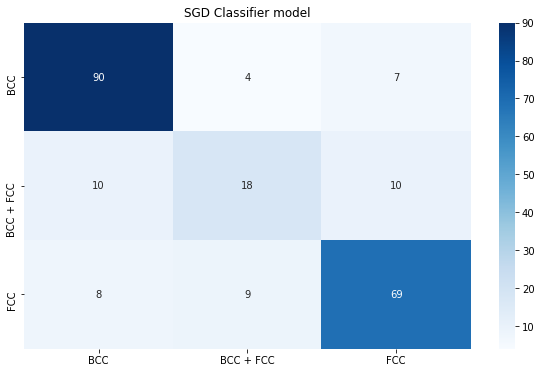

In [151]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= 'Blues', xticklabels= labels, yticklabels= labels)
plt.title("SGD Classifier model")
plt.show()

In [149]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision : {round(precision, 2)}")
print(f"Recall : {round(recall, 2)}")
print(f"Accuracy : {round(accuracy, 2)}")

Precision : 0.74
Recall : 0.72
Accuracy : 0.79


---

### Decision Tree

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_classifier = DecisionTreeClassifier()
scores = cross_val_score(dt_classifier, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.88 ± 0.02


In [153]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(dt_classifier, X_prep_test, y_test, cv= 5)

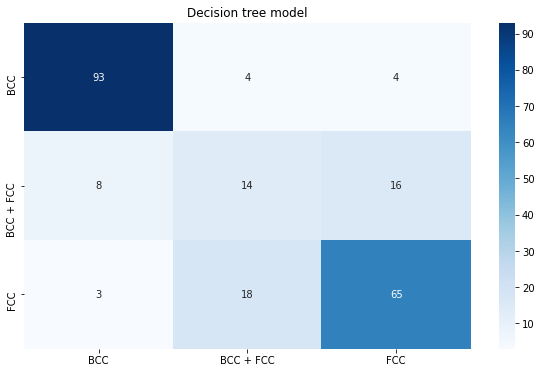

In [156]:
# confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= 'Blues', xticklabels= labels, yticklabels= labels)
plt.title("Decision tree model")
plt.show()

In [155]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision : {round(precision, 2)}")
print(f"Recall : {round(recall, 2)}")
print(f"Accuracy : {round(accuracy, 2)}")

Precision : 0.68
Recall : 0.68
Accuracy : 0.76


---

### Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_classifier = RandomForestClassifier()
scores = cross_val_score(rf_classifier, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.9 ± 0.02


In [158]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(rf_classifier, X_prep_test, y_test, cv= 5)

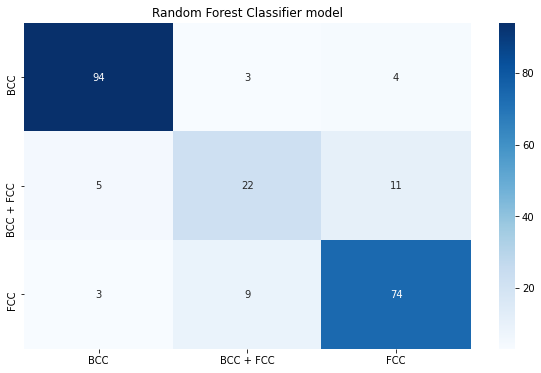

In [162]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= "Blues", xticklabels= labels, yticklabels= labels)
plt.title("Random Forest Classifier model")
plt.show()

In [160]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= "macro")
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision : {round(precision, 2)}")
print(f"Recall : {round(recall, 2)}")
print(f"Accuracy : {round(accuracy, 2)}")

Precision : 0.8
Recall : 0.79
Accuracy : 0.84


---

### K Neighbors Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knc_classifier = KNeighborsClassifier()
scores = cross_val_score(knc_classifier, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

NameError: name 'X_prep_train' is not defined

In [164]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(knc_classifier, X_prep_test, y_test, cv= 5)

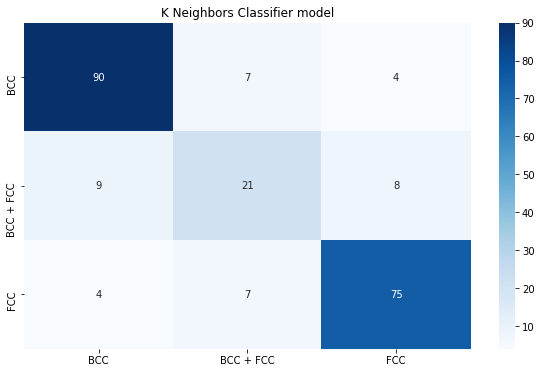

In [166]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= 'Blues', xticklabels= labels, yticklabels= labels)
plt.title("K Neighbors Classifier model")
plt.show()

In [90]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= "macro")
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision : {round(precision, 2)}")
print(f"Recall : {round(recall, 2)}")
print(f"Accuracy : {round(accuracy, 2)}")

Precision : 0.74
Recall : 0.74
Accuracy : 0.78


---

In [167]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb_classifier = XGBClassifier(booster= 'gbtree')
scores = cross_val_score(xgb_classifier, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

[16:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [168]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(xgb_classifier, X_prep_test, y_test, cv= 5)

[16:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

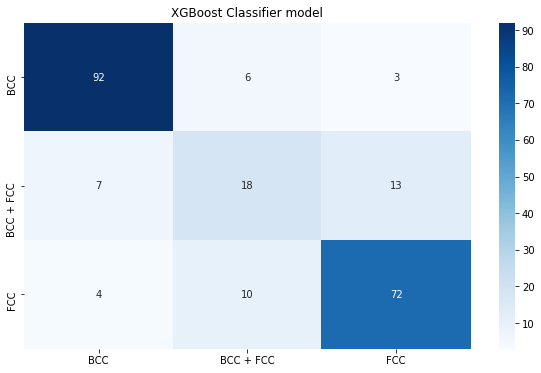

In [170]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= 'Blues', xticklabels= labels, yticklabels= labels)
plt.title("XGBoost Classifier model")
plt.show()

In [171]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= "macro")
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision : {round(precision, 2)}")
print(f"Recall : {round(recall, 2)}")
print(f"Accuracy : {round(accuracy, 2)}")

Precision : 0.75
Recall : 0.74
Accuracy : 0.81


### Salvando o modelo
````python
import joblib

joblib.dump(xgb_classifier, 'xgb_classifier.pkl')
````

In [116]:
xgb_classifier.fit(X_prep_train, y_train)

[17:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
xgb_classifier.feature_importances_

array([0.01499572, 0.02519357, 0.01919171, 0.10699963, 0.04136686,
       0.0101062 , 0.00465371, 0.00484914, 0.0042433 , 0.        ,
       0.07301957, 0.0092963 , 0.13263941, 0.03937273, 0.        ,
       0.        , 0.        , 0.14527704, 0.05356439, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00679897,
       0.01372977, 0.18598506, 0.0148135 , 0.01369358, 0.04371662,
       0.01641825, 0.02007493], dtype=float32)

In [124]:
X_train.columns

Index(['Co', 'Fe', 'Ni', 'Si', 'Al', 'Cr', 'Mo', 'Nb', 'Ti', 'C', 'V', 'Zr',
       'Mn', 'Cu', 'B', 'Y', 'Sn', 'Li', 'Mg', 'Zn', 'Sc', 'Hf', 'Ta', 'W',
       'radius_diff', 'electronegativity', 'vec', 'dHmix', 'dSmix', 'Tm',
       'dHel', 'omega'],
      dtype='object')

In [130]:
feature_importances = pd.DataFrame({"feature": X_train.columns,
                       "importances": xgb_classifier.feature_importances_}).sort_values(by='importances', ascending= False)
feature_importances

,feature,importances
26,vec,0.185985
17,Li,0.145277
12,Mn,0.132639
3,Si,0.107000
10,V,0.073020
18,Mg,0.053564
29,Tm,0.043717
4,Al,0.041367
13,Cu,0.039373
1,Fe,0.025194


In [138]:
X_new = X_prep_test[5:10]
y_pred_new = xgb_classifier.predict(X_new)
y_pred_new

array([2, 1, 2, 2, 1])

In [139]:
y_test[5:10]

array([[2],
       [1],
       [1],
       [2],
       [1]])

### Conclusão
Random Forest se mostrou com melhor performance. Refazer com XGBoost e Neural Network

---

### Refazer os modelos com Random Forest, XGBoost e Redes Neurais 20/01/2025

In [250]:
# importando as bibliotecas em comum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [251]:
df = pd.read_csv("no_im_df.csv")
df.head()

,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,C,...,W,radius_diff,electronegativity,vec,dHmix,dSmix,Tm,dHel,omega,phase_treated
0,33.333333,33.333333,33.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.327647,0.032998,9.000000,-1.333333,9.134412,1769.150000,0.043021,12.120109,FCC
1,30.769231,30.769231,30.769231,7.692308,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,2.025282,0.032490,8.615385,-11.834320,10.686569,1762.842308,1.000238,1.591873,FCC
2,28.571429,28.571429,28.571429,14.285714,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,2.657710,0.031944,8.285714,-19.428571,11.239408,1757.435714,1.729124,1.016675,FCC
3,26.666667,26.666667,26.666667,20.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,3.045363,0.031383,8.000000,-24.960000,11.468125,1752.750000,2.287570,0.805319,FCC
4,30.769231,30.769231,30.769231,0.000000,7.692308,0.0,0.0,0.0,0.0,0.0,...,0.0,3.944930,0.077000,8.538462,-6.059172,10.686569,1704.842308,2.503838,3.006833,FCC


In [252]:
# Definir X e y
X = df.drop('phase_treated', axis= 1)
y = df['phase_treated'].copy()

In [253]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [254]:
# labels
labels = label_encoder.inverse_transform(np.unique(y))

In [255]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [256]:
# Aplicando o Standard Scaler após split para não ter Data Leakage.
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)

In [257]:
# Models: RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_classifier = RandomForestClassifier()
scores = cross_val_score(rf_classifier, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(), 2)} \u00b1 {round(scores.std(), 2)}")

0.91 ± 0.03


In [258]:
# Aplicar grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 10, 15]}

grid_search = GridSearchCV(rf_classifier, param_grid= param_grid, scoring= 'accuracy', return_train_score= True)
grid_search.fit(X_prep_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

In [259]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=200)

In [260]:
model_grid = grid_search.best_estimator_
scores = cross_val_score(model_grid, X_prep_train, y_train, cv= 5, scoring= 'accuracy')
print(f"{round(scores.mean(), 2)} \u00b1 {round(scores.std(), 5)}")

0.91 ± 0.03222


In [261]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_test = standard_scaler.fit_transform(X_test)

In [262]:
# prever com os dois modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

y_pred_rf = cross_val_predict(rf_classifier, X_prep_test, y_test, cv= 5)
y_pred_grid = cross_val_predict(model_grid, X_prep_test, y_test, cv= 5)

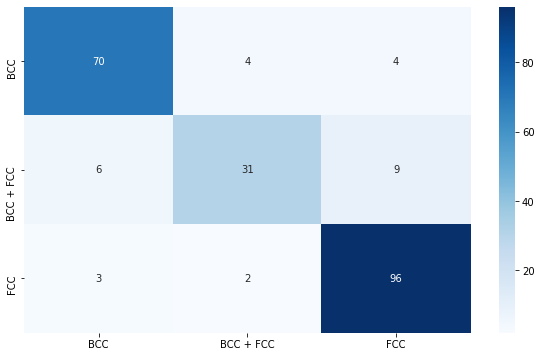

In [263]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot= True, cmap= 'Blues', xticklabels= labels, yticklabels= labels)
plt.show()

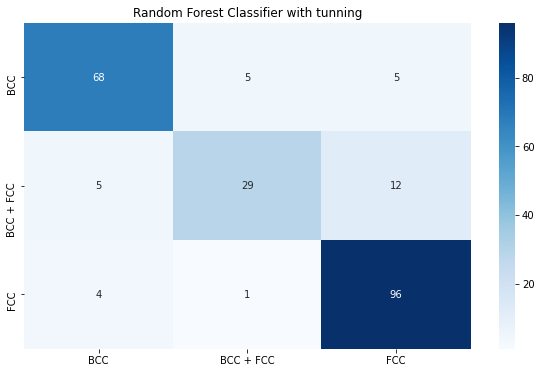

In [264]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot= True, cmap= 'Blues', xticklabels= labels, yticklabels= labels)
plt.title("Random Forest Classifier with tunning")
plt.show()

In [265]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision_rf = precision_score(y_test, y_pred_rf, average= 'macro')
recall_rf = recall_score(y_test, y_pred_rf, average= 'macro')
accuracy_rf = accuracy_score(y_test, y_pred_rf)

precision_grid = precision_score(y_test, y_pred_grid, average= 'macro')
recall_grid = recall_score(y_test, y_pred_grid, average= 'macro')
accuracy_grid = accuracy_score(y_test, y_pred_grid)

print("RandomForestClassifier sem tunning")
print(f"Precision : {round(precision_rf,2)}")
print(f"Recall : {round(recall_rf,2)}")
print(f"Accuracy : {round(accuracy_rf,2)}")
print("-------------------------------------")
print("RandomForestClassifier com tunning")
print(f"Precision : {round(precision_grid,2)}")
print(f"Recall : {round(recall_grid,2)}")
print(f"Accuracy : {round(accuracy_grid,2)}")

RandomForestClassifier sem tunning
Precision : 0.87
Recall : 0.84
Accuracy : 0.88
-------------------------------------
RandomForestClassifier com tunning
Precision : 0.85
Recall : 0.82
Accuracy : 0.86


In [266]:


features = pd.DataFrame({'features': X_train.columns})
importance = pd.DataFrame({'importance': rf_classifier.feature_importances_})*100
importances = pd.concat([features, importance], axis= 1).sort_values(by= 'importance', ascending= False)
importances

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Conclusão com RandomForestClassifier:
Atingiu uma acurácia de 84% sem a necessidade de tunning.

---

In [44]:
# model: XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb_classifier = XGBClassifier()
scores = cross_val_score(xgb_classifier, X_prep_train, y_train, scoring= 'accuracy', cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

[17:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [45]:
# Avaliar com os dados de teste
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(xgb_classifier, X_prep_test, y_test, cv= 5)

[17:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

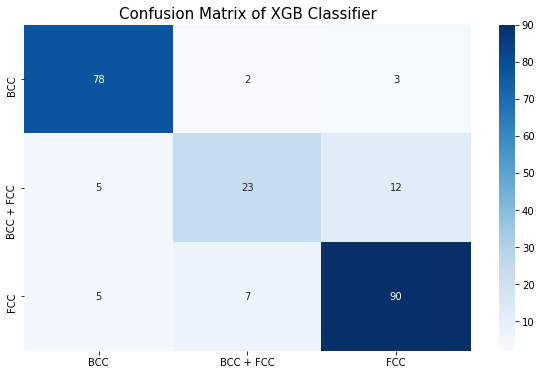

In [51]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot= True,
            cmap= 'Blues',
            xticklabels= labels,
            yticklabels= labels)
plt.title("Confusion Matrix of XGB Classifier", fontsize= 15)
plt.show()

In [52]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision : {round(precision,2)}")
print(f"Recall : {round(recall,2)}")
print(f"Accuracy : {round(accuracy,2)}")

Precision : 0.82
Recall : 0.8
Accuracy : 0.85


### XGB Classifier:
Tem boas métricas em dados de teste. Consegue distiguir bem ao comparar fase 'BCC' e 'BCC + FCC'.

----

In [53]:
# model: Redes Neurais
import tensorflow
from tensorflow import keras

In [189]:
# importando os dados
df = pd.read_csv('no_im_df.csv')
df.head()

,Co,Fe,Ni,Si,Al,Cr,Mo,Nb,Ti,C,...,W,radius_diff,electronegativity,vec,dHmix,dSmix,Tm,dHel,omega,phase_treated
0,33.333333,33.333333,33.333333,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.327647,0.032998,9.000000,-1.333333,9.134412,1769.150000,0.043021,12.120109,FCC
1,30.769231,30.769231,30.769231,7.692308,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,2.025282,0.032490,8.615385,-11.834320,10.686569,1762.842308,1.000238,1.591873,FCC
2,28.571429,28.571429,28.571429,14.285714,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,2.657710,0.031944,8.285714,-19.428571,11.239408,1757.435714,1.729124,1.016675,FCC
3,26.666667,26.666667,26.666667,20.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,3.045363,0.031383,8.000000,-24.960000,11.468125,1752.750000,2.287570,0.805319,FCC
4,30.769231,30.769231,30.769231,0.000000,7.692308,0.0,0.0,0.0,0.0,0.0,...,0.0,3.944930,0.077000,8.538462,-6.059172,10.686569,1704.842308,2.503838,3.006833,FCC


#### Preparação dos dados

In [190]:
# Separar os dados de input e output
X = df.drop('phase_treated', axis= 1)
y = df['phase_treated'].copy()

In [191]:
# Aplicar LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [192]:
# definir a lista de labels
labels = label_encoder.inverse_transform(np.unique(y))

In [193]:
# Split em treino e test
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size= 0.2)

In [194]:
# Separar dados de validação, vamos usar train test split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.2)

In [195]:
# Padronizar os inputs
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)
X_prep_val = standard_scaler.fit_transform(X_val)
X_prep_test = standard_scaler.fit_transform(X_test)

#### Construção do modelo

In [226]:
input_ = keras.layers.Input(shape= X_prep_train.shape[1:])
hidden1 = keras.layers.Dense(100, activation= 'relu')(input_)
hidden2 = keras.layers.Dense(100, activation= 'relu')(hidden1)
output = keras.layers.Dense(3, activation= 'softmax')(hidden2)
model = keras.Model(inputs= input_, outputs= output)

In [227]:
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 32)]              0         
                                                                 
 dense_50 (Dense)            (None, 100)               3300      
                                                                 
 dense_51 (Dense)            (None, 100)               10100     
                                                                 
 dense_52 (Dense)            (None, 3)                 303       
                                                                 
Total params: 13,703
Trainable params: 13,703
Non-trainable params: 0
_________________________________________________________________


#### Compilar o modelo

In [228]:
model.compile(loss= 'sparse_categorical_crossentropy', 
              optimizer= 'sgd', 
              metrics= 'accuracy')

#### Treinar o modelo com callbacks

In [229]:
es = keras.callbacks.EarlyStopping(patience= 10, restore_best_weights= True)
history = model.fit(X_prep_train, y_train, epochs= 100, callbacks= es, validation_data =[X_prep_val, y_val])

Epoch 1/100
23/23 [==============================] - 0s 8ms/step - loss: 1.0606 - accuracy: 0.4826 - val_loss: 0.9385 - val_accuracy: 0.5944
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8371 - accuracy: 0.6940 - val_loss: 0.8371 - val_accuracy: 0.6222
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7368 - accuracy: 0.7316 - val_loss: 0.7798 - val_accuracy: 0.6611
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.7497 - val_loss: 0.7386 - val_accuracy: 0.6778
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.7580 - val_loss: 0.7072 - val_accuracy: 0.7000
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5985 - accuracy: 0.7733 - val_loss: 0.6827 - val_accuracy: 0.7278
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.7886 - val_loss: 0.6596 - val_accuracy: 0.7167
Epoch 8/100
2

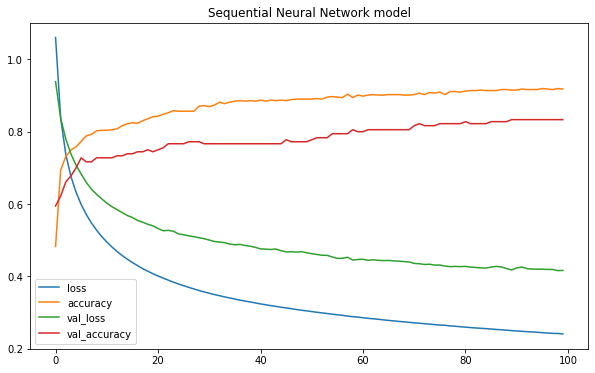

In [232]:
pd.DataFrame(history.history).plot(figsize= (10,6))
plt.title("Sequential Neural Network model")
plt.show()

#### Evaluate the model com os dados de teste

In [231]:
cross_entropy_eval = model.evaluate(X_prep_test, y_test)
cross_entropy_eval

8/8 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8489


[0.4157109260559082, 0.8488888740539551]

### Redes Neurais

Acurácia dos dados de treino: 92%  
Acurácia dos dados de validação: 84%  
Acurácia dos dados de teste = 85.3%

----

### Aplicar SMOTE nos dados para classificar fases 11/02/2025
##### Considerações:
- SMOTE só deve ser aplicado aos dados de treino, NUNCA NOS DADOS DE TESTE.
- SMOTE cria sintéticos com base nos vizinhos próximos. Isso pode introduzir problemas se os dados tiverem outliers.
- Pode aumentar a complexidade computacional

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Baixar o dataset
df = pd.read_csv("no_im_df.csv")

# Definir X e y
X = df.drop('phase_treated', axis= 1)
y = df['phase_treated'].copy()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# labels
labels = label_encoder.inverse_transform(np.unique(y))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [4]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)
X_prep_test = standard_scaler.fit_transform(X_test)

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state= 42)
X_res_prep_train, y_res_train = smote.fit_resample(X_prep_train, y_train)

In [16]:
print(f"Sem SMOTE {np.bincount(y_train)}")
print(f"Com SMOTE {np.bincount(y_res_train)}")

Sem SMOTE [343 165 391]
Com SMOTE [391 391 391]


In [17]:
# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Instanciar
rf_classifier = RandomForestClassifier()

# Cross validation
scores = cross_val_score(rf_classifier, X_res_prep_train, y_res_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.92 ± 0.02


In [20]:
# Evaluate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Instanciar e treinar
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_res_prep_train, y_res_train)

# Prever e avaliar
y_pred = rf_classifier.predict(X_prep_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average= 'macro')
rf_recall = recall_score(y_test, y_pred, average= 'macro')
print(f"accuracy: {rf_accuracy}")
print(f"precision: {rf_precision}")
print(f"recall: {rf_recall}")

accuracy: 0.8488888888888889
precision: 0.8142730694277086
recall: 0.8159473376864681


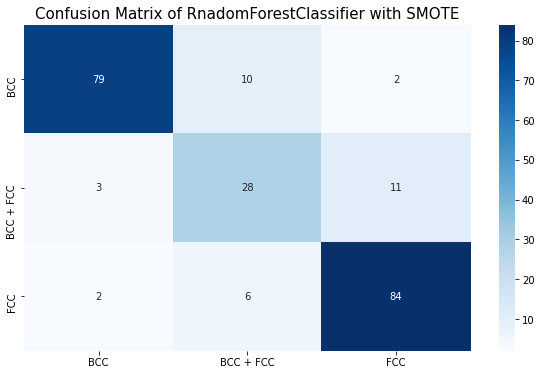

In [21]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot= True,
            cmap= 'Blues',
            xticklabels= labels,
            yticklabels= labels)
plt.title("Confusion Matrix of RnadomForestClassifier with SMOTE", fontsize= 15)
plt.show()

---


In [23]:
# LogisticRegression
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Instanciar
lr_classifier = LogisticRegression()

# Cross validation
scores = cross_val_score(lr_classifier, X_res_prep_train, y_res_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.85 ± 0.02


In [24]:
# Evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Instanciar e treinar
lr_classifier = LogisticRegression()
lr_classifier.fit(X_res_prep_train, y_res_train)

# Prever e avaliar
y_pred = lr_classifier.predict(X_prep_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average= 'macro')
rf_recall = recall_score(y_test, y_pred, average= 'macro')
print(f"accuracy: {rf_accuracy}")
print(f"precision: {rf_precision}")
print(f"recall: {rf_recall}")

accuracy: 0.7777777777777778
precision: 0.7632377266427809
recall: 0.779343844561236


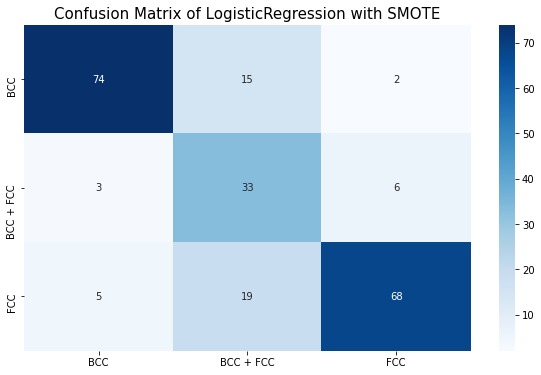

In [25]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot= True,
            cmap= 'Blues',
            xticklabels= labels,
            yticklabels= labels)
plt.title("Confusion Matrix of LogisticRegression with SMOTE", fontsize= 15)
plt.show()

### Conclusão com SMOTE
- Aparentemente, não houve melhora com RandomForestClassifier, e piorou com LogisticRegression

---

#### Correlation on HEA criteria    11/02/2025

In [26]:
import pandas as pd

In [28]:
df = pd.read_csv("full_mec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Alloy                                            1217 non-null   object 
 1   Nome tratado                                     1217 non-null   object 
 2   Co                                               1217 non-null   float64
 3   Fe                                               1217 non-null   float64
 4   Ni                                               1217 non-null   float64
 5   Si                                               1217 non-null   float64
 6   Al                                               1217 non-null   float64
 7   Cr                                               1217 non-null   float64
 8   Mo                                               1217 non-null   float64
 9   Nb                            

In [32]:
df_hea = df.iloc[:,26:34]
df_hea.head()

,atomic radius (δ) [%],Electronegativity (Δχ),Valence Electron Concentration (VEC),Ω parameter,Entalpia de mix (dHmix) [kJ/mol],Entropia de mix (dSmix) [J/K.mol],Melting temperature (Tm) [K],Elastic-strain energy criterion (dHel) [kJ/mol]
0,0.327647,0.032998,9.000000,12.120109,-1.333333,9.134412,1769.150000,0.043021
1,2.025282,0.032490,8.615385,1.591873,-11.834320,10.686569,1762.842308,1.000238
2,2.657710,0.031944,8.285714,1.016675,-19.428571,11.239408,1757.435714,1.729124
3,3.045363,0.031383,8.000000,0.805319,-24.960000,11.468125,1752.750000,2.287570
4,3.944930,0.077000,8.538462,3.006833,-6.059172,10.686569,1704.842308,2.503838


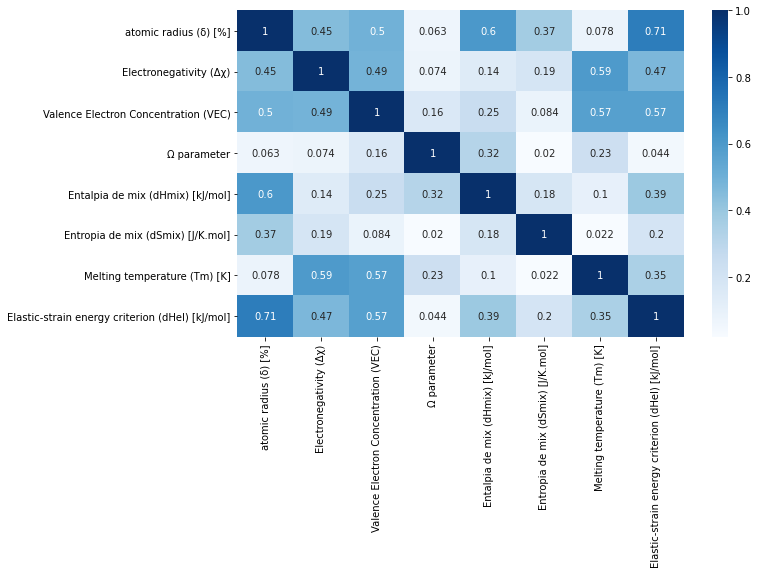

In [35]:
plt.figure(figsize= (10,6))
sns.heatmap(abs(df_hea.corr()), annot= True, cmap= "Blues", )
plt.show()

---

### LightGBM e testar com RandomForestClassifier sem StandardScaler   11/02/2025

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Baixar o dataset
df = pd.read_csv("no_im_df.csv")

# Definir X e y
X = df.drop('phase_treated', axis= 1)
y = df['phase_treated'].copy()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# labels
labels = label_encoder.inverse_transform(np.unique(y))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

### LightGBM

In [15]:
# LightGBM - não preprocessar o input
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label= y_train)
test_data = lgb.Dataset(X_test, label= y_test, reference= train_data)

#params = {"objective": "multiclass", "num_class": 3}
params = {
    'objective': 'multiclass',       # Define que a tarefa é de classificação multiclasse
    'num_class': 3,                  # Número de classes a ser predito (nesse caso, 3)
    'metric': 'multi_logloss',       # Métrica para avaliação da performance (usando log-loss)
    'boosting_type': 'gbdt',         # Tipo de boosting (padrão: GBDT)
    'num_leaves': 40,                # Número de folhas na árvore
    'learning_rate': 0.05,           # Taxa de aprendizado
    'feature_fraction': 0.9,         # Proporção de features a ser usada em cada iteração
    #'bagging_fraction': 0.8,         # Proporção de amostras a ser usada para o bagging
    #'bagging_freq': 5,               # Frequência do bagging
    'max_depth': -1,                 # Profundidade máxima das árvores (valor negativo significa sem limite)
    'lambda_l2': 0.1,                # Regularização L2 (Ridge)
}
# treinar
lgb_classifier = lgb.train(params, train_data)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2666
[LightGBM] [Info] Number of data points in the train set: 899, number of used features: 25
[LightGBM] [Info] Start training from score -0.949081
[LightGBM] [Info] Start training from score -1.689295
[LightGBM] [Info] Start training from score -0.848040
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score

y_pred = lgb_classifier.predict(X_test)
y_pred_max = [np.argmax(x) for x in y_pred]
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred_max)
precision = precision_score(y_test, y_pred_max, average= "macro")
recall = recall_score(y_test, y_pred_max, average= "macro")
r2 = r2_score(y_test, y_pred_max)

print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'R2: {r2:.4f}')

Acurácia: 0.9111
Precisão: 0.8832
Recall: 0.9012
R2: 0.8746


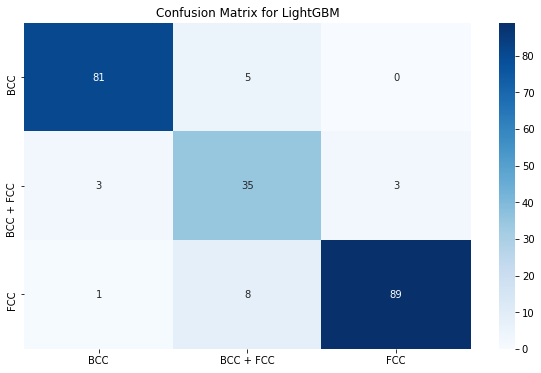

In [17]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_max), 
            annot= True, 
            cmap= "Blues", 
            xticklabels= labels, 
            yticklabels= labels)
plt.title("Confusion Matrix for LightGBM")
plt.show()

---

### LightGBM, Sckit-learn API    12/02/2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Baixar o dataset
df = pd.read_csv("no_im_df.csv")

# Definir X e y
X = df.drop('phase_treated', axis= 1)
y = df['phase_treated'].copy()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# labels
labels = label_encoder.inverse_transform(np.unique(y))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [ ]:
params = {
    'objective': 'multiclass',       # Define que a tarefa é de classificação multiclasse
    'num_class': 3,                  # Número de classes a ser predito (nesse caso, 3)
    'metric': 'multi_logloss',       # Métrica para avaliação da performance (usando log-loss)
    'boosting_type': 'gbdt',         # Tipo de boosting (padrão: GBDT)
    'num_leaves': 40,                # Número de folhas na árvore
    'learning_rate': 0.05,           # Taxa de aprendizado
    'feature_fraction': 0.9,         # Proporção de features a ser usada em cada iteração
    #'bagging_fraction': 0.8,         # Proporção de amostras a ser usada para o bagging
    #'bagging_freq': 5,               # Frequência do bagging
    'max_depth': -1,                 # Profundidade máxima das árvores (valor negativo significa sem limite)
    'lambda_l2': 0.1,                # Regularização L2 (Ridge)
}

In [49]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

lgbm_classifier = LGBMClassifier()
params = {
    'objective': 'multiclass',       # Define que a tarefa é de classificação multiclasse
    'num_class': 3,                  # Número de classes a ser predito (nesse caso, 3)
    'metric': 'accuracy',            # Métrica para avaliação da performance
    'learning_rate': 0.05,
    'num_leaves': 40,                # Regularizar por número de folhas
    'lambda_l2': 0.1,                # Regularização L2 (Ridge)
}

scores = cross_val_score(lgbm_classifier, X_train, y_train, scoring= "accuracy", cv= 5)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2438
[LightGBM] [Info] Number of data points in the train set: 719, number of used features: 25
[LightGBM] [Info] Start training from score -0.950240
[LightGBM] [Info] Start training from score -1.687512
[LightGBM] [Info] Start training from score -0.847762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [51]:
print(f"{round(scores.mean(),5)} \u00b1 {round(scores.std(),2)}")

0.9021 ± 0.02


In [37]:
# evaluating
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score

# Instanciar e treinar
lgbm_classifier = LGBMClassifier()
params = {
    'objective': 'multiclass',       # Define que a tarefa é de classificação multiclasse
    'num_class': 3,                  # Número de classes a ser predito (nesse caso, 3)
    'metric': 'accuracy',                # Métrica para avaliação da performance (usando log-loss)
    'lambda_l2': 0.1,                # Regularização L2 (Ridge)
}

lgbm_classifier.fit(X_train, y_train)

# Predizer e avaliar
y_pred = lgbm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
r2 = r2_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"R2: {r2}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2666
[LightGBM] [Info] Number of data points in the train set: 899, number of used features: 25
[LightGBM] [Info] Start training from score -0.949081
[LightGBM] [Info] Start training from score -1.689295
[LightGBM] [Info] Start training from score -0.848040
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [38]:
# Correlation
lgbm_df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
lgbm_df.corr()

,y_test,y_pred
y_test,1.000000,0.932063
y_pred,0.932063,1.000000


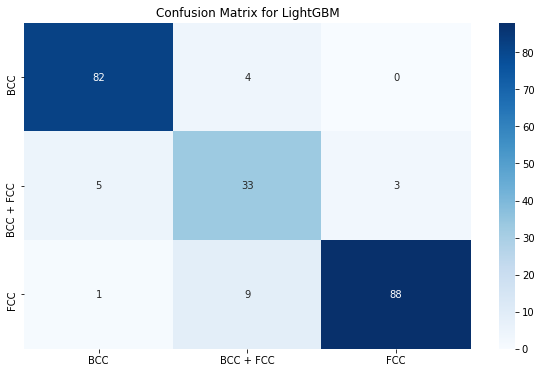

In [39]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot= True, 
            cmap= "Blues", 
            xticklabels= labels, 
            yticklabels= labels)
plt.title("Confusion Matrix for LightGBM")
plt.show()

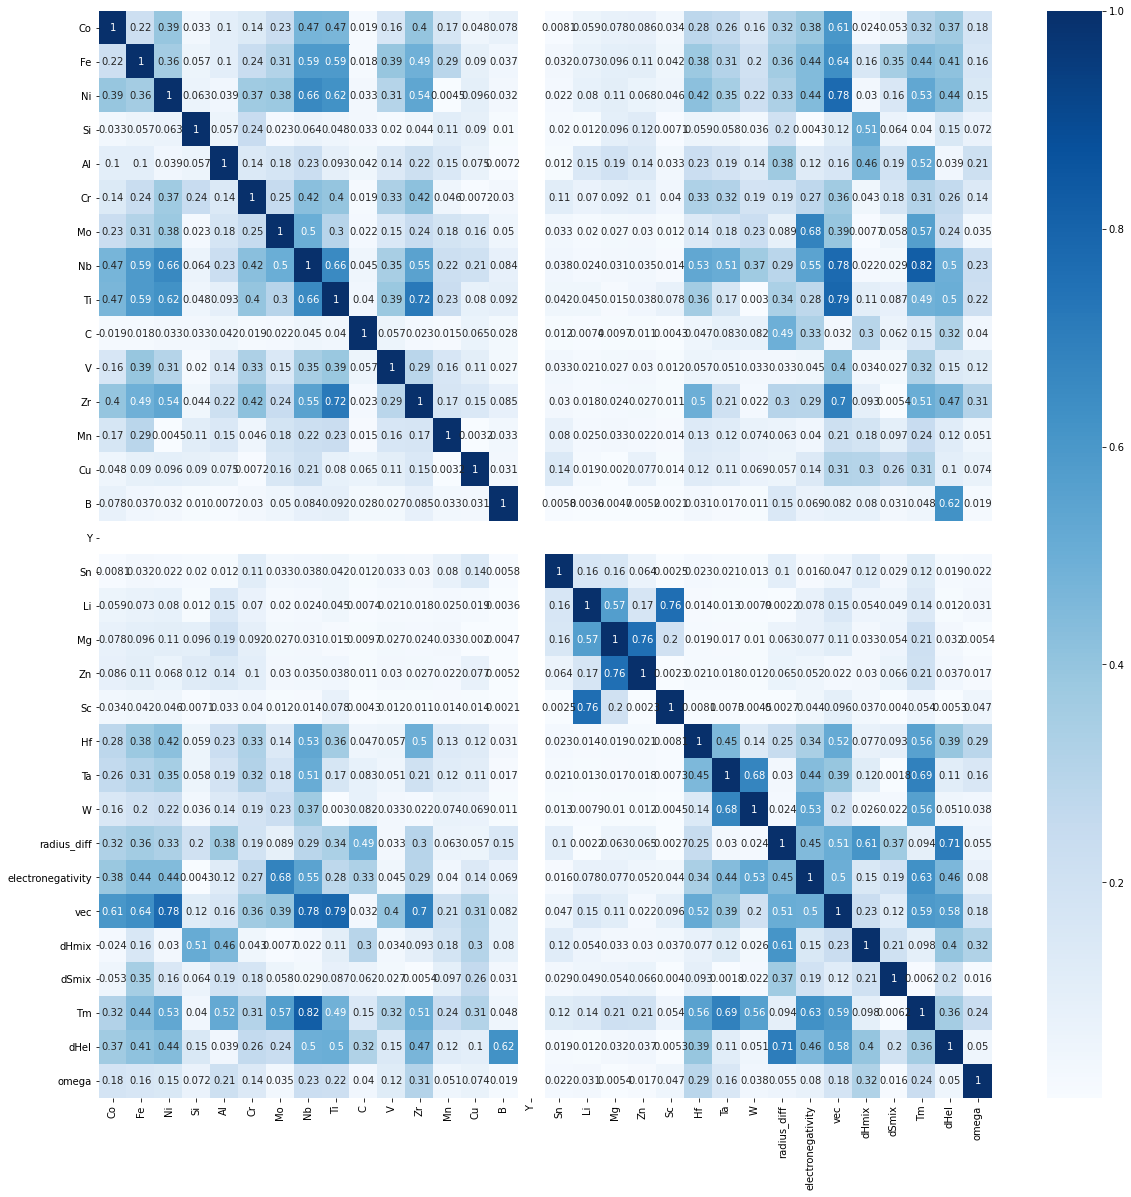

In [57]:
plt.figure(figsize= (20,20))
sns.heatmap(abs(df.corr()), annot= True, cmap= "Blues")
plt.show()

---

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [60]:
# Baixar o dataset
df = pd.read_csv("no_im_df.csv")

# Definir X e y
X = df.drop('phase_treated', axis= 1)
y = df['phase_treated'].copy()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# labels
labels = label_encoder.inverse_transform(np.unique(y))

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [63]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)
X_prep_test = standard_scaler.fit_transform(X_test)

In [67]:
# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Instanciar
knc_classifier = KNeighborsClassifier()

# Cross validation
scores = cross_val_score(knc_classifier, X_prep_train, y_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.87 ± 0.02


In [68]:
# Evaluating
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Instanciar e treinar
knc_classifier = KNeighborsClassifier()
knc_classifier.fit(X_prep_train, y_train)

# Prever e avaliar
y_pred = knc_classifier.predict(X_prep_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
r2 = r2_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"R2: {r2}")

Accuracy: 0.8577777777777778
Precision: 0.8364070720367343
Recall: 0.820999068743215
R2: 0.6355060034305317


In [69]:
# Correlation
lgbm_df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
lgbm_df.corr()

,y_test,y_pred
y_test,1.00000,0.81961
y_pred,0.81961,1.00000


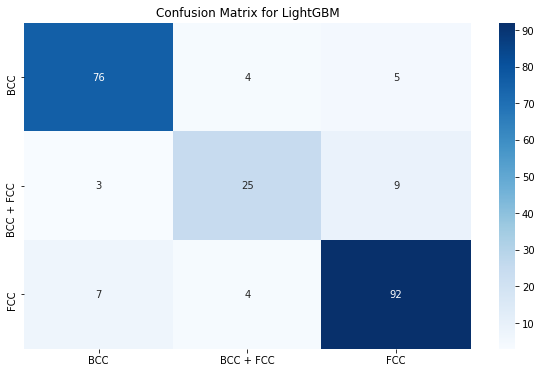

In [70]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot= True, 
            cmap= "Blues", 
            xticklabels= labels, 
            yticklabels= labels)
plt.title("Confusion Matrix for LightGBM")
plt.show()

---

#### Aplicar XGBoost e RandomForestClassifier sem StandardScaler    13/02/2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# arquivo: no_im_df.csv
df = pd.read_csv("no_im_df.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Co                 1124 non-null   float64
 1   Fe                 1124 non-null   float64
 2   Ni                 1124 non-null   float64
 3   Si                 1124 non-null   float64
 4   Al                 1124 non-null   float64
 5   Cr                 1124 non-null   float64
 6   Mo                 1124 non-null   float64
 7   Nb                 1124 non-null   float64
 8   Ti                 1124 non-null   float64
 9   C                  1124 non-null   float64
 10  V                  1124 non-null   float64
 11  Zr                 1124 non-null   float64
 12  Mn                 1124 non-null   float64
 13  Cu                 1124 non-null   float64
 14  B                  1124 non-null   float64
 15  Y                  1124 non-null   float64
 16  Sn                 1124 

In [3]:
# Separar os dados de input do target
X = df.drop("phase_treated", axis= 1)
y = df["phase_treated"].copy()

In [5]:
# Transformar dados de target em numérico
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

labels = label_encoder.inverse_transform(np.unique(y))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [9]:
# Sem preprocessing

#### RandomForestClassifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Instanciar
rf_classifier = RandomForestClassifier()

# Cross validation
scores = cross_val_score(rf_classifier, X_train, y_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.91 ± 0.01


In [13]:
# Evaluate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Instanciar e treinar
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Prever e avaliar
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")

Accuracy : 0.9111111111111111
Precision : 0.8875112309074574
Recall : 0.869018280258315


In [14]:
# Correlation
rf_df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
rf_df.corr()

,y_test,y_pred
y_test,1.000000,0.946026
y_pred,0.946026,1.000000


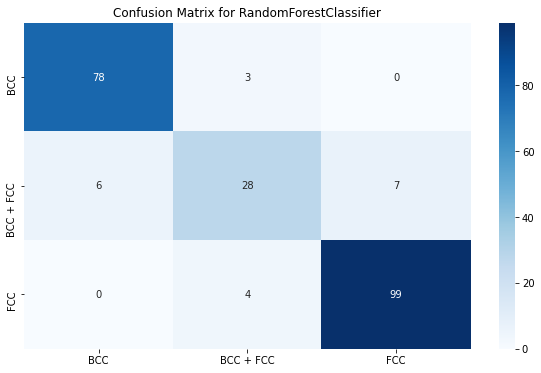

In [15]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot= True, 
            cmap= "Blues", 
            xticklabels= labels, 
            yticklabels= labels)
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

In [26]:
rf_classifier.feature_importances_

array([2.64952110e-02, 3.61585462e-02, 8.10688652e-02, 6.23207663e-03,
       8.72084853e-02, 2.91763364e-02, 4.07011439e-03, 4.31467871e-02,
       1.83197531e-02, 1.23370741e-03, 6.28614161e-03, 1.01825364e-02,
       2.53044492e-02, 2.98401366e-02, 3.08968445e-04, 0.00000000e+00,
       8.73378834e-04, 9.21071260e-04, 2.56598241e-03, 1.17359038e-03,
       1.26377664e-04, 1.94290422e-03, 3.71698175e-03, 5.67451373e-04,
       7.76572254e-02, 4.46759198e-02, 1.81596746e-01, 5.71455134e-02,
       3.65972979e-02, 6.53291691e-02, 8.14170449e-02, 3.86612302e-02])

In [27]:
# Feature importances
features = pd.DataFrame({'features': X_train.columns})
importance = pd.DataFrame({'importance': rf_classifier.feature_importances_})*100
importances = pd.concat([features, importance], axis= 1).sort_values(by= 'importance', ascending= False)
importances

,features,importance
26,vec,18.159675
4,Al,8.720849
30,dHel,8.141704
2,Ni,8.106887
24,radius_diff,7.765723
29,Tm,6.532917
27,dHmix,5.714551
25,electronegativity,4.467592
7,Nb,4.314679
31,omega,3.866123


----

In [19]:
# XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Instanciar
sgb_classifier = XGBClassifier()

# Cross validation
scores = cross_val_score(sgb_classifier, X_train, y_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

[17:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [22]:
# Evaluate
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Instanciar e treinar
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Prever e avaliar
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= "macro")
recall = recall_score(y_test, y_pred, average= "macro")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

[17:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9244444444444444
Precision: 0.9008467869578981
Recall: 0.8974233791241185


In [23]:
# Correlation
rf_df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
rf_df.corr()

,y_test,y_pred
y_test,1.000000,0.953375
y_pred,0.953375,1.000000


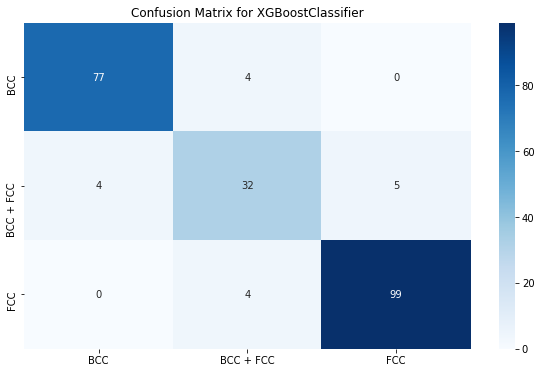

In [25]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot= True, 
            cmap= "Blues", 
            xticklabels= labels, 
            yticklabels= labels)
plt.title("Confusion Matrix for XGBoostClassifier")
plt.show()

<Figure size 1440x720 with 0 Axes>

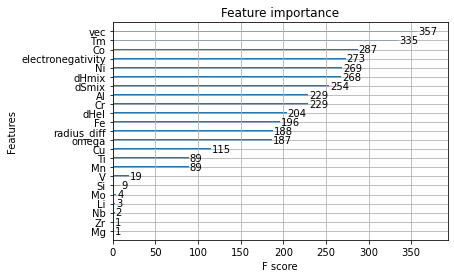

In [31]:
from xgboost import plot_importance

plt.figure(figsize= (20,10))
plot_importance(xgb_classifier)
plt.show()

---

### Usar AUC-ROC curve para medir a qualidade do modelo de classificação.    14/02/2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("no_im_df.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Co                 1124 non-null   float64
 1   Fe                 1124 non-null   float64
 2   Ni                 1124 non-null   float64
 3   Si                 1124 non-null   float64
 4   Al                 1124 non-null   float64
 5   Cr                 1124 non-null   float64
 6   Mo                 1124 non-null   float64
 7   Nb                 1124 non-null   float64
 8   Ti                 1124 non-null   float64
 9   C                  1124 non-null   float64
 10  V                  1124 non-null   float64
 11  Zr                 1124 non-null   float64
 12  Mn                 1124 non-null   float64
 13  Cu                 1124 non-null   float64
 14  B                  1124 non-null   float64
 15  Y                  1124 non-null   float64
 16  Sn                 1124 

In [3]:
# Separar dados de input de target
X = df.drop("phase_treated", axis= 1)
y = df["phase_treated"].copy()

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

labels = label_encoder.inverse_transform(np.unique(y))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [11]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_prep_train = standard_scaler.fit_transform(X_train)
X_prep_test = standard_scaler.fit_transform(X_test)

#### Modelos

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Instanciar
lr_classifier = LogisticRegression()

# Cross validation
scores = cross_val_score(lr_classifier, X_prep_train, y_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.83 ± 0.02


In [23]:
# Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Instanciar e treinar
lr_classifier = LogisticRegression()
lr_classifier.fit(X_prep_train, y_train)

# Prever e avaliar
y_pred = lr_classifier.predict(X_prep_test)
y_pred_proba = lr_classifier.predict_proba(X_prep_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class= "ovr")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"For this example, AUC-ROC score is {round(roc_auc,4)}, it means that {100*round(roc_auc,2)}% of the time, the model will assign a high probability to a positive example than to a negative one")

Accuracy: 0.8533333333333334
Precision: 0.8130214728152872
Recall: 0.8183688316901231
ROC-AUC: 0.9367691345408087
For this example, AUC-ROC score is 0.9368, it means that 94.0% of the time, the model will assign a high probability to a positive example than to a negative one


----

In [25]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# Instanciar
sgd_classifier = SGDClassifier()

# Cross validation
scores = cross_val_score(sgd_classifier, X_prep_train, y_train, scoring= "accuracy", cv= 5)
print(f"{scores.mean()} \u00b1 {scores.std()}")

0.8020111731843576 ± 0.029462367898079198


In [29]:
# Evaluating
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Instanciar e treinar
sgd_classifier = SGDClassifier(loss= 'log')
sgd_classifier.fit(X_prep_train, y_train)

# Prever e avaliar
y_pred = sgd_classifier.predict(X_prep_test)
y_pred_proba = sgd_classifier.predict_proba(X_prep_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class= "ovr")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"For this example, AUC-ROC score is {round(roc_auc,4)}, it means that {100*round(roc_auc,2)}% of the time, the model will assign a high probability to a positive example than to a negative one")

Accuracy: 0.7288888888888889
Precision: 0.7354204061521136
Recall: 0.7521115041435656
ROC-AUC: 0.9086272860785911
For this example, AUC-ROC score is 0.9086, it means that 91.0% of the time, the model will assign a high probability to a positive example than to a negative one


---

In [31]:
# SVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Instanciar
svc = SVC()

# Cross validation
scores = cross_val_score(svc, X_prep_train, y_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.84 ± 0.02


In [33]:
# evaluating
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Instanciar e treinar
svc = SVC(probability= True)
svc.fit(X_prep_train, y_train)

# Prever e avaliar
y_pred = svc.predict(X_prep_test)
y_pred_proba = svc.predict_proba(X_prep_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class= "ovr")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"For this example, AUC-ROC score is {round(roc_auc,4)}, it means that {100*round(roc_auc,2)}% of the time, the model will assign a high probability to a positive example than to a negative one")

Accuracy: 0.8622222222222222
Precision: 0.8380904183535763
Recall: 0.798830101268575
ROC-AUC: 0.9381142612848294
For this example, AUC-ROC score is 0.9381, it means that 94.0% of the time, the model will assign a high probability to a positive example than to a negative one


---

In [47]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Instanciar
dt_classifier = DecisionTreeClassifier()

# Cross validation
scores = cross_val_score(dt_classifier, X_prep_train, y_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.87 ± 0.02


In [50]:
# Evaluating
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Instanciar e treinar
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_prep_train, y_train)

# Prever e avaliar
y_pred = dt_classifier.predict(X_prep_test)
y_pred_proba = dt_classifier.predict_proba(X_prep_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class= "ovr")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"For this example, AUC-ROC score is {round(roc_auc,4)}, it means that {100*round(roc_auc,2)}% of the time, the model will assign a high probability to a positive example than to a negative one")

Accuracy: 0.7644444444444445
Precision: 0.7469221483392481
Recall: 0.7659554451719727
ROC-AUC: 0.854778492049947
For this example, AUC-ROC score is 0.8548, it means that 85.0% of the time, the model will assign a high probability to a positive example than to a negative one


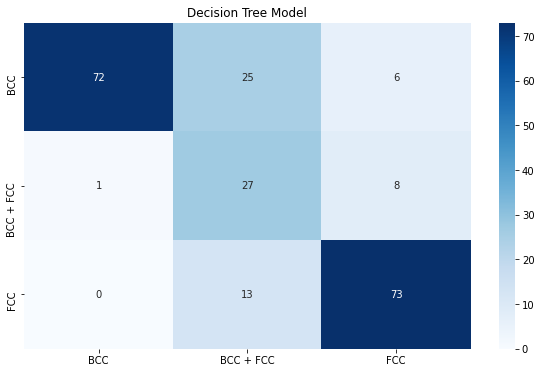

In [51]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= "Blues", xticklabels= labels, yticklabels= labels)
plt.title("Decision Tree Model")
plt.show()

---

In [61]:
# With preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Instanciar
xgb_classifier = XGBClassifier()

# Cross validation
scores = cross_val_score(xgb_classifier, X_prep_train, y_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

[21:25:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [62]:
# Evaluate
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Instanciar e treinar
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_prep_train, y_train)

# Prever e avaliar
y_pred = xgb_classifier.predict(X_prep_test)
y_pred_proba = xgb_classifier.predict_proba(X_prep_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class= "ovr")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"For this example, AUC-ROC score is {round(roc_auc,4)}, it means that {100*round(roc_auc,2)}% of the time, the model will assign a high probability to a positive example than to a negative one")

[21:25:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8844444444444445
Precision: 0.8531723212574276
Recall: 0.8590915932866712
ROC-AUC: 0.9648699160884675
For this example, AUC-ROC score is 0.9649, it means that 96.0% of the time, the model will assign a high probability to a positive example than to a negative one


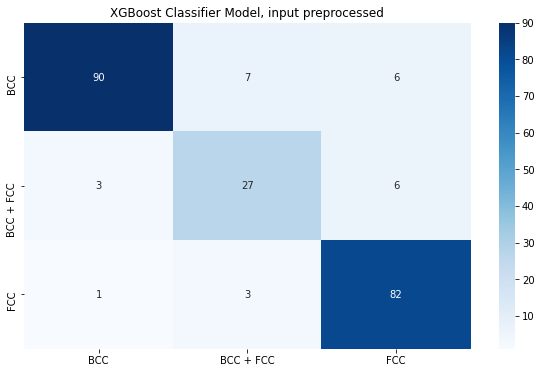

In [63]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= "Blues", xticklabels= labels, yticklabels= labels)
plt.title("XGBoost Classifier Model, input preprocessed")
plt.show()

---

In [66]:
# No preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Instanciar
xgb_classifier = XGBClassifier()

# Cross validation
scores = cross_val_score(xgb_classifier, X_train, y_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

[21:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [67]:
# Evaluate
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Instanciar e treinar
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Prever e avaliar
y_pred = xgb_classifier.predict(X_test)
y_pred_proba = xgb_classifier.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class= "ovr")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"For this example, AUC-ROC score is {round(roc_auc,4)}, it means that {100*round(roc_auc,2)}% of the time, the model will assign a high probability to a positive example than to a negative one")

[21:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9466666666666667
Precision: 0.9231077996036227
Recall: 0.9231077996036227
ROC-AUC: 0.9853630728431453
For this example, AUC-ROC score is 0.9854, it means that 99.0% of the time, the model will assign a high probability to a positive example than to a negative one


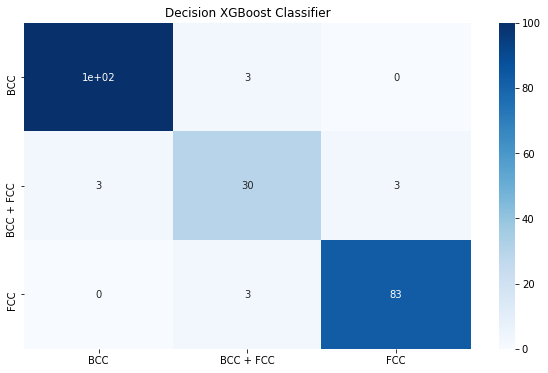

In [60]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= "Blues", xticklabels= labels, yticklabels= labels)
plt.title("Decision XGBoost Classifier")
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

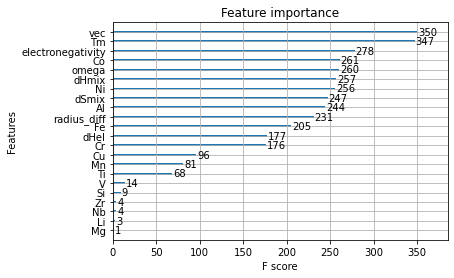

In [68]:
from xgboost import plot_importance

plot_importance(xgb_classifier)

---

In [69]:
# RandomForestClassifier with preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Instanciar
rf_classifier = RandomForestClassifier()

# Cross validation
scores = cross_val_score(rf_classifier, X_prep_train, y_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.91 ± 0.02


In [71]:
# Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Instanciar e treinar
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_prep_train, y_train)

# Evaluating
y_pred = rf_classifier.predict(X_prep_test)
y_pred_proba = rf_classifier.predict_proba(X_prep_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class= "ovr")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"For this example, AUC-ROC score is {round(roc_auc,4)}, it means that {100*round(roc_auc,2)}% of the time, the model will assign a high probability to a positive example than to a negative one")

Accuracy: 0.8711111111111111
Precision: 0.8351504788974257
Recall: 0.8614288820317269
ROC-AUC: 0.9746978649845476
For this example, AUC-ROC score is 0.9747, it means that 97.0% of the time, the model will assign a high probability to a positive example than to a negative one


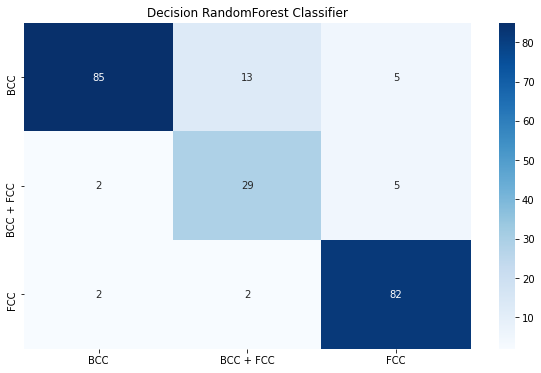

In [73]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= "Blues", xticklabels= labels, yticklabels= labels)
plt.title("Decision RandomForest Classifier")
plt.show()

---

In [74]:
# RandomForestClassifier no preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Instanciar
rf_classifier = RandomForestClassifier()

# Cross validation
scores = cross_val_score(rf_classifier, X_train, y_train, scoring= "accuracy", cv= 5)
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.91 ± 0.01


In [75]:
# Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Instanciar e treinar
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluating
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class= "ovr")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"For this example, AUC-ROC score is {round(roc_auc,4)}, it means that {100*round(roc_auc,2)}% of the time, the model will assign a high probability to a positive example than to a negative one")

Accuracy: 0.9422222222222222
Precision: 0.9214708662984524
Recall: 0.9078255270397966
ROC-AUC: 0.9899510189891475
For this example, AUC-ROC score is 0.99, it means that 99.0% of the time, the model will assign a high probability to a positive example than to a negative one


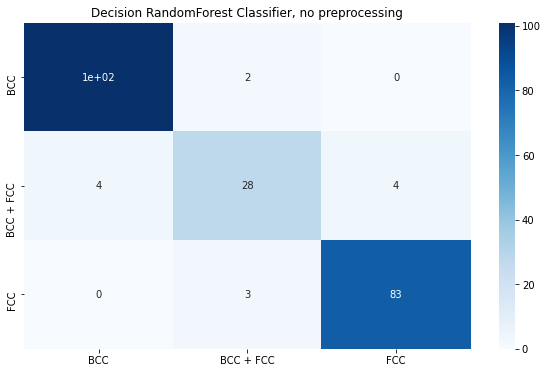

In [76]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize= (10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap= "Blues", xticklabels= labels, yticklabels= labels)
plt.title("Decision RandomForest Classifier, no preprocessing")
plt.show()

In [82]:
rf_importances = pd.DataFrame({"Feature": X.columns,"Importances": 100*rf_classifier.feature_importances_}).sort_values(by= 'Importances', ascending= False)
rf_importances

,Feature,Importances
26,vec,19.095846
4,Al,9.757730
24,radius_diff,8.786665
30,dHel,8.032377
2,Ni,7.668569
29,Tm,7.229742
27,dHmix,5.121067
1,Fe,3.789204
31,omega,3.601579
28,dSmix,3.546811


---

In [86]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

# Instanciar
params = {
    'objective': 'multiclass',       # Define que a tarefa é de classificação multiclasse
    'num_class': 3,                  # Número de classes a ser predito (nesse caso, 3)
    'metric': 'accuracy',            # Métrica para avaliação da performance
    'learning_rate': 0.05,
    'num_leaves': 40,                # Regularizar por número de folhas
    'lambda_l2': 0.1,                # Regularização L2 (Ridge)
}
lgbm_classifier = LGBMClassifier()

# Cross validation
scores = cross_val_score(lgbm_classifier, X_prep_train, y_train, scoring= "accuracy", cv= 5)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2403
[LightGBM] [Info] Number of data points in the train set: 719, number of used features: 24
[LightGBM] [Info] Start training from score -0.998132
[LightGBM] [Info] Start training from score -1.657880
[LightGBM] [Info] Start training from score -0.818960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [87]:
print(f"{round(scores.mean(),2)} \u00b1 {round(scores.std(),2)}")

0.91 ± 0.01


In [89]:
# evaluating
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Instanciar e treinar
lgbm_classifier = LGBMClassifier()
params = {
    'objective': 'multiclass',       # Define que a tarefa é de classificação multiclasse
    'num_class': 3,                  # Número de classes a ser predito (nesse caso, 3)
    'metric': 'accuracy',                # Métrica para avaliação da performance (usando log-loss)
    'lambda_l2': 0.1,                # Regularização L2 (Ridge)
}

lgbm_classifier.fit(X_prep_train, y_train)

# Predizer e avaliar
y_pred = lgbm_classifier.predict(X_prep_test)
y_pred_proba = lgbm_classifier.predict_proba(X_prep_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred, average= 'macro')
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class= "ovr")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2617
[LightGBM] [Info] Number of data points in the train set: 899, number of used features: 25
[LightGBM] [Info] Start training from score -0.999165
[LightGBM] [Info] Start training from score -1.659619
[LightGBM] [Info] Start training from score -0.817347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu